In [9]:
# stampa data e ora
import datetime
inizio = datetime.datetime.now()
print(inizio)

2025-07-02 13:21:23.360314


## Mini-progetto per il corso di Intelligenza Artificiale della scuola di psicologia

| | |
|-|-|
| **Nome** |  Luca |
| **Cognome**| Parise |
| **Matricola** | 2043677 |
| **Data di consegna** | 02/07/2025 |

Di seguito potete trovare il mio lavoro in cui rispondo alle domande presenti nel pdf denominato "*Linee guida per la preparazione del mini-progetto individuale*" trovato sul moodle.

Il file divide le domande in base alle lettere A,B,C,D,E ed un ultimo punto chiamato BONUS in cui brevemente espongo l'uso di alcuni modelli sul dataset FashionMnist.

Non tutti i punti/capitoli sono eseguibili indipendentemente l'uno dall'altro. Infatti, il punto B utilizza dei modelli addestrati nel punto A. Al momento della stesura del codice, infatti, mi sembrava una cosa intelligente e che mi avrebbe fatto risparmiare tempo (e cosi in effetti è stato). Tuttavia, arrivato alla fine avrei preferito aver reso eseguibile in modo indipendente ogni punto/domanda.
Di sicuro avrebbe reso meglio come progetto.
Avrei potuto riscrivere parte del codice ma per questioni di tempo mi sono dovuto fermare.

Ogni modulo/punto è eseguibile e non produce errori (al momento in cui sto scrivendo). Il mio consiglio è di cliccare sul bottone in alto denominato "*Esegui tutte*" e aspettare che termini l'esecuzione. In ogni caso, il file .ipynb dovrebbe aver salvato tutte le immagini e una volta caricato queste dovrebbero essere visualizzabili senza dover rieseguire il codice.

Ogni punto è accompagnato da una risposta dedicata, tranne il punto A, per il quale ho preferito lasciare alcune considerazioni direttamente nel codice, in corrispondenza delle diverse prove e configurazioni dei modelli.
\
\
\
Spero di aver comunque svolto un lavoro discreto e di aver analizzato un numero sufficiente di casi. Il progetto (e il corso) mi ha coinvolto e l'ho trovato molto interessante. Sicuramente il numero di combinazioni di iper-parametri da poter analizzare è molto vasto e qui ho sfiorato solo la punta dell'iceberg.

### Tempistiche di esecuzione
|||
|-|-|
|Inizio esecuzione codice|2025-07-02 13:21:23.360314|
|Fine esecuzione codice|2025-07-02 14:46:40.842841|
|Tempo totale esecuzione codice|1:25:17.482527|


# Intro

## utils

In [10]:
def mostra_immagine (img, label=None):
  plt.imshow(img, cmap='gray')
  if label is not None:
    plt.title("Etichetta = " + str(label))
  plt.axis("off")
  plt.show()

## Importazione librerie di supporto

incominciamo con l'importare le librerie di cui abbiamo bisogno:



*   numpy
*   matplotlib.pyplot
*   MLPClassifier
*   accuracy_score
*   confusion_matrix
*   ConfusionMatrixDisplay
*   MNIST
*   torchvision.transforms
*   train_test_split

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from torchvision.datasets import MNIST
import torchvision.transforms as transforms


## download dataset e sua configurazione

Scarichiamo il dataset per addestrare e testare la rete

In [12]:
# Scarica il dataset, tr=training te=test
mnist_tr = MNIST(root="./data", train=True, download=True)
mnist_te = MNIST(root="./data", train=False, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 481kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.67MB/s]


In questo momento il tipo di dato scaricato non è utilizzabile da noi.

Infatti, se provo a fare print(mnist_te[1]) ottengo la seguente riga "<PIL.Image.Image image mode=L size=28x28 at 0x79AD9AA417D0>, 2)"

Dobbiamo quindi convertirlo utilizzando la libreria numpy con le seguenti rifhe di codice:

In [13]:
print(mnist_te[1])

(<PIL.Image.Image image mode=L size=28x28 at 0x78F6DB246650>, 2)


In [14]:
mnist_tr, mnist_tr_labels = mnist_tr.data.numpy(), mnist_tr.targets.numpy()
mnist_te, mnist_te_labels = mnist_te.data.numpy(), mnist_te.targets.numpy()

In [15]:
print(type(mnist_tr[0]))  # mostra tipo -> <class 'numpy.ndarray'>

<class 'numpy.ndarray'>


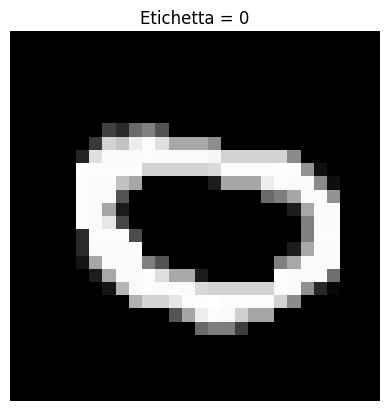

In [16]:
mostra_immagine(mnist_tr[4500], mnist_tr_labels[4500])

In [17]:
# numero di immagini contenute nell'array
print("immagini di training->",len(mnist_tr), " e numero di label->",len(mnist_tr_labels))
print("immagini di test->",len(mnist_te), " e numero di label->",len(mnist_te_labels))
print("dimensione di un'immagine:", mnist_tr[0].shape)

immagini di training-> 60000  e numero di label-> 60000
immagini di test-> 10000  e numero di label-> 10000
dimensione di un'immagine: (28, 28)


Siccome il classificatore MLP ha bisogno di vettori 1D e non 2D, devo portare ogni valore dell'array in un formato coerente.

In [18]:
x_tr = mnist_tr.reshape(len(mnist_tr), 28*28)
x_te = mnist_te.reshape(len(mnist_te), 28*28)

In [19]:
print("Numero di immagini di training:", len(x_tr))
print("Numero di immagini di test:", len(x_te))
print("dimensione di una immagine:", x_tr[0].shape)

Numero di immagini di training: 60000
Numero di immagini di test: 10000
dimensione di una immagine: (784,)


Normalizziamo i valori (adesso tra 0 e 255) portandoli tra 0 e 1

In [20]:
x_tr = x_tr/255
x_te = x_te/255

# A
* Come cambia la prestazione dei modelli (MLP e/o CNN) al variare del numero di neuroni e/o numero di strati  nascosti?
* Quali altri iper-parametri hanno un effetto significativo sull’apprendimento? Dimostrarlo con qualche simulazione.

## MLP

### Modello del laboratorio

In [21]:
# modello del laboratorio 3
MLP = MLPClassifier(hidden_layer_sizes=(500,500),
                    max_iter=10,
                    random_state=42)

In [22]:
MLP = MLP.fit(x_tr,mnist_tr_labels)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


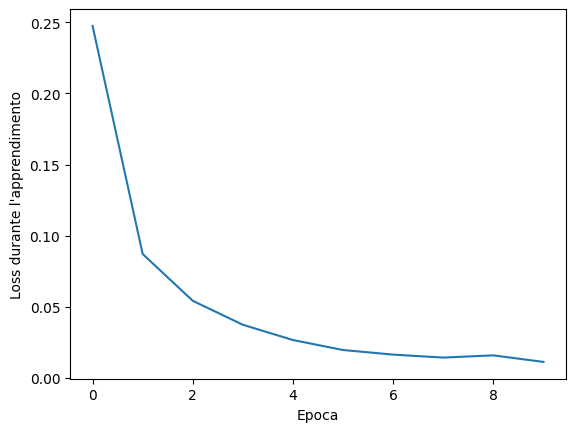

In [23]:
# curva dell'errore, l'accuratezza media e la matrice di confusione
_A = plt.plot(range(MLP.n_iter_), MLP.loss_curve_)
_A = plt.xlabel("Epoca")
_A = plt.ylabel("Loss durante l'apprendimento")


In [24]:
# accuratezza del modello appena addestrato sui dati di test
MLP.score(x_te, mnist_te_labels)

0.9806

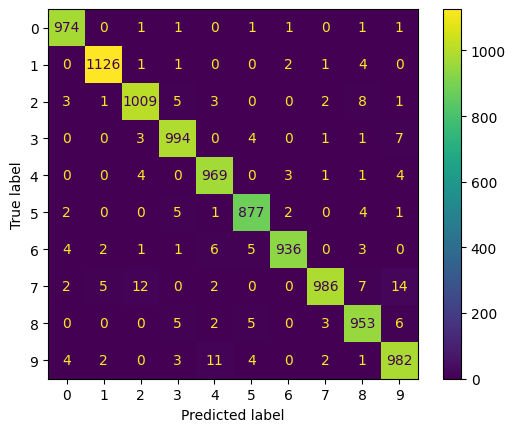

In [25]:
# proviamo a prevedere con il modello quali valori darebbero sui valori di test
# e li confrontiamo con quelli effettivi. Mostriamo attraverso una matrice
# di confusione

x_te_predictions = MLP.predict(x_te)
_B = ConfusionMatrixDisplay.from_predictions(mnist_te_labels, x_te_predictions)

### E se cambiassimo il numero degli strati nascosti ?

Il modello appena addestrato aveva 2 strati ognuno con 500 neuroni.

Proviamo ora ad addestrare dei modelli, ciascuno con un diverso numero di strati nascosti (gli altri iperparametri uguali).



In [26]:
# xhl, x=numero di strati nascosti, hl=hidden layer

MLP_0hl = MLPClassifier(hidden_layer_sizes=(),max_iter=10,random_state=42,)
MLP_1hl = MLPClassifier(hidden_layer_sizes=(500,),max_iter=10,random_state=42)
MLP_2hl = MLPClassifier(hidden_layer_sizes=(500,500),max_iter=10,random_state=42)
MLP_3hl = MLPClassifier(hidden_layer_sizes=(500,500,500),max_iter=10,random_state=42)

In [27]:
# Addestramento ~10m
MLP_0hl = MLP_0hl.fit(x_tr,mnist_tr_labels) # non converge
MLP_1hl = MLP_1hl.fit(x_tr,mnist_tr_labels) # non converge
MLP_2hl = MLP_2hl.fit(x_tr,mnist_tr_labels) # non converge
MLP_3hl = MLP_3hl.fit(x_tr,mnist_tr_labels) # non converge

# ha impiegato circa 10 minuti per completare l'addestramento
# e nessun modello ha raggiunto la convergenza


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


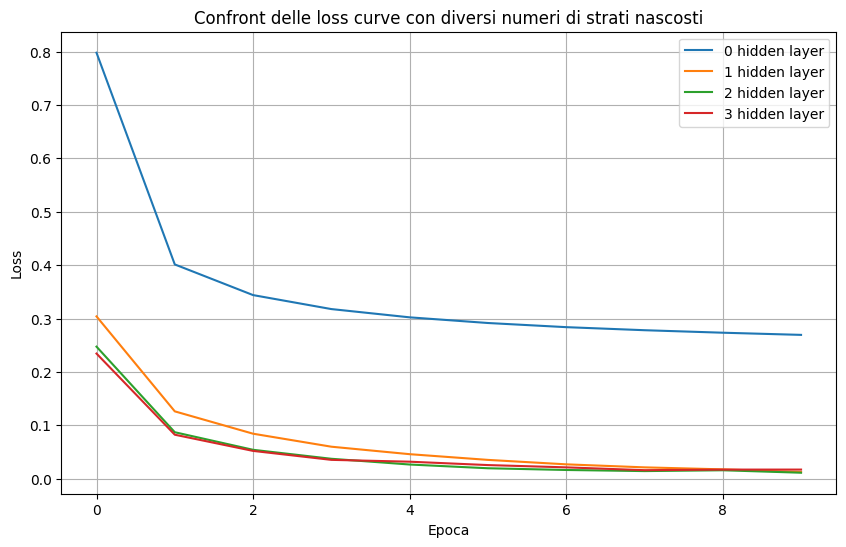

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(MLP_0hl.n_iter_), MLP_0hl.loss_curve_, label="0 hidden layer")
plt.plot(range(MLP_1hl.n_iter_), MLP_1hl.loss_curve_, label="1 hidden layer")
plt.plot(range(MLP_2hl.n_iter_), MLP_2hl.loss_curve_, label="2 hidden layer")
plt.plot(range(MLP_3hl.n_iter_), MLP_3hl.loss_curve_, label="3 hidden layer")

plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.title("Confront delle loss curve con diversi numeri di strati nascosti")
plt.show()

In [29]:
# accuratezza dei vari modelli dopo l'addestramento
score_0hl = MLP_0hl.score(x_te, mnist_te_labels)
score_1hl = MLP_1hl.score(x_te, mnist_te_labels)
score_2hl = MLP_2hl.score(x_te, mnist_te_labels)
score_3hl = MLP_3hl.score(x_te, mnist_te_labels)

print("Accuratezza MLP con 0 strati nascosti:", score_0hl)
print("Accuratezza MLP con 1 strato nascosto:", score_1hl)
print("Accuratezza MLP con 2 strati nascosti:", score_2hl)
print("Accuratezza MLP con 3 strati nascosti:", score_3hl)

Accuratezza MLP con 0 strati nascosti: 0.9251
Accuratezza MLP con 1 strato nascosto: 0.9822
Accuratezza MLP con 2 strati nascosti: 0.9806
Accuratezza MLP con 3 strati nascosti: 0.9775


Sorprendentemente con 3 strati nascosti l'accuratezza del modello diminuisce. Anche l'accuratezza del secondo modello con due strati nascosti diminuisce rispetto al precedente (anche se praticamente uguale)

|# strati| score|
|-----|-----|
|0|0.9251|
|1|0.9822|
|2|0.9806|
|3|0.9775|


### E se cambiasssimo il numero dei neuroni ?

Proviamo ora a vedere cosa succede quando andiamo a cambiare il numero di neuroni in un semplice MLP con solo uno strato nascosto.

|# neuroni| score|
|-----|-----|
|5|0.8766|
|50|0.9686|
|500|0.9822|
|5000|0.9831|

In [30]:
MLP_5 = MLPClassifier(hidden_layer_sizes=(5),max_iter=10,random_state=42)
MLP_50 = MLPClassifier(hidden_layer_sizes=(50),max_iter=10,random_state=42)
MLP_500 = MLPClassifier(hidden_layer_sizes=(500),max_iter=10,random_state=42)
MLP_5000 = MLPClassifier(hidden_layer_sizes=(5000),max_iter=10,random_state=42)

In [31]:
# addestramento ~16m
MLP_5 = MLP_5.fit(x_tr,mnist_tr_labels)
MLP_50 = MLP_50.fit(x_tr,mnist_tr_labels)
MLP_500 = MLP_500.fit(x_tr,mnist_tr_labels)
MLP_5000 = MLP_5000.fit(x_tr,mnist_tr_labels)
# ha impiegato circa 16 minuti

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


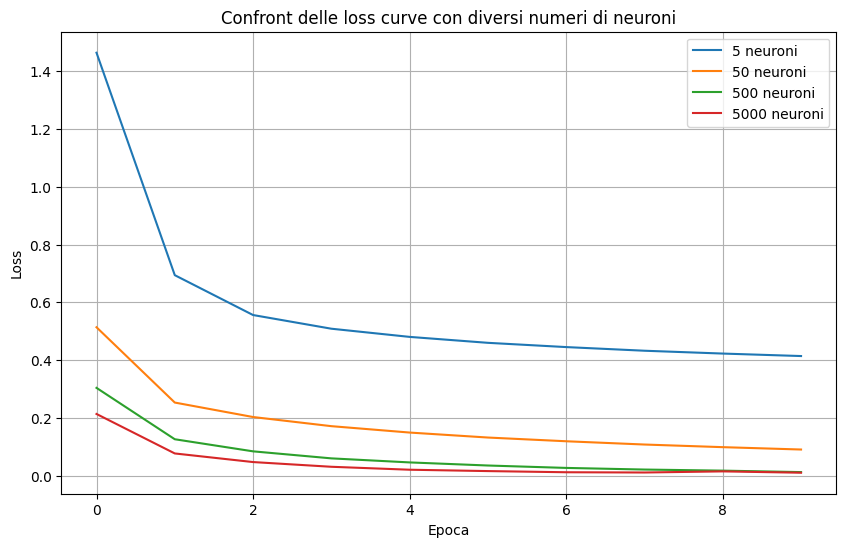

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(MLP_5.n_iter_), MLP_5.loss_curve_, label="5 neuroni")
plt.plot(range(MLP_50.n_iter_), MLP_50.loss_curve_, label="50 neuroni")
plt.plot(range(MLP_500.n_iter_), MLP_500.loss_curve_, label="500 neuroni")
plt.plot(range(MLP_5000.n_iter_), MLP_5000.loss_curve_, label="5000 neuroni")

plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.title("Confront delle loss curve con diversi numeri di neuroni")
plt.show()

Più neuroni usiamo, più velocemente il modello sembra convergere

In [33]:
score_5 = MLP_5.score(x_te, mnist_te_labels)
score_50 = MLP_50.score(x_te, mnist_te_labels)
score_500 = MLP_500.score(x_te, mnist_te_labels)
score_5000 = MLP_5000.score(x_te, mnist_te_labels)

print("Accuratezza MLP con 5 neuroni:", score_5)
print("Accuratezza MLP con 50 neuroni:", score_50)
print("Accuratezza MLP con 500 neuroni:", score_500)
print("Accuratezza MLP con 5000 neuroni:", score_5000)

Accuratezza MLP con 5 neuroni: 0.8766
Accuratezza MLP con 50 neuroni: 0.9686
Accuratezza MLP con 500 neuroni: 0.9822
Accuratezza MLP con 5000 neuroni: 0.9831


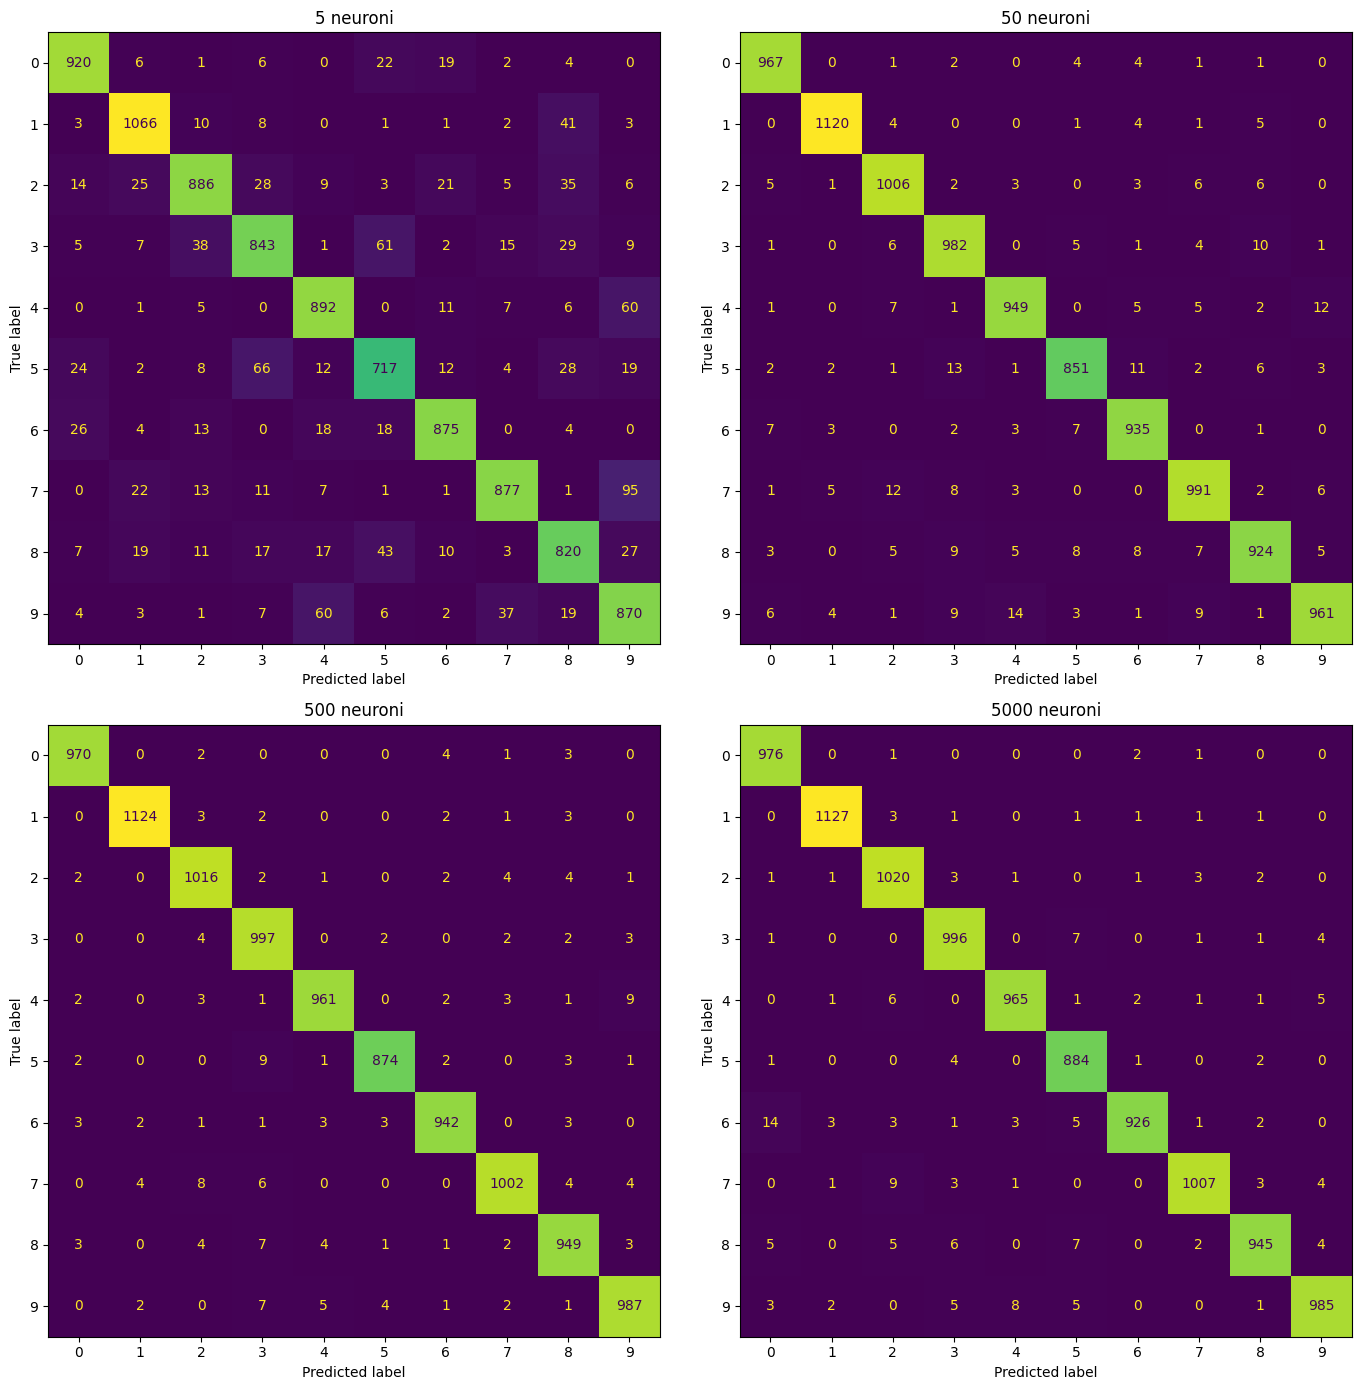

In [34]:
# Lista dei modelli
models = [
    (MLP_5, "5 neuroni"),
    (MLP_50, "50 neuroni"),
    (MLP_500, "500 neuroni"),
    (MLP_5000, "5000 neuroni")
]

# Visualizza le matrici (2x2)
fig, axs = plt.subplots(2, 2, figsize=(14, 14))
axs = axs.flatten()

for i, (model, title) in enumerate(models):
    y_pred = model.predict(x_te)
    cm = confusion_matrix(mnist_te_labels, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axs[i], colorbar=False)
    axs[i].set_title(title)

plt.tight_layout()
plt.show()

### E se cambiassimo sia il numero dei neuroni sia il numero di strati ?

Risultati dell'addestramento fatto di seguito:

| # Neuroni per layer | # Strati nascosti | Accuratezza (%) |
|-----------|-----------|------------|
| 5     | 1  | 0.8766 |
| 5     | 2  | 0.7992 |
| 5     | 3  | 0.7919 |
| 50    | 1  | 0.9686 |
| 50    | 2  | 0.9713 |
| 50    | 3  | 0.9697 |
| 100   | 1  | 0.9736 |
| 100   | 2  | 0.9751 |
| 100   | 3  | 0.9768 |

In [35]:
# MLP_x_y dove:
# x è il numero di neuorni per strato
# y è il numero di strati nascosti

# Configurazioni dei modelli
MLP_5_1 = MLPClassifier(hidden_layer_sizes=(5,), max_iter=10, random_state=42)
MLP_5_2 = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=10, random_state=42)
MLP_5_3 = MLPClassifier(hidden_layer_sizes=(5, 5, 5), max_iter=10, random_state=42)

MLP_50_1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, random_state=42)
MLP_50_2 = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=10, random_state=42)
MLP_50_3 = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=10, random_state=42)

MLP_100_1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, random_state=42)
MLP_100_2 = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10, random_state=42)
MLP_100_3 = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10, random_state=42)

In [36]:
# Addestramento

MLP_5_1 = MLP_5_1.fit(x_tr, mnist_tr_labels)
MLP_5_2 = MLP_5_2.fit(x_tr, mnist_tr_labels)
MLP_5_3 = MLP_5_3.fit(x_tr, mnist_tr_labels)

MLP_50_1 = MLP_50_1.fit(x_tr, mnist_tr_labels)
MLP_50_2 = MLP_50_2.fit(x_tr, mnist_tr_labels)
MLP_50_3 = MLP_50_3.fit(x_tr, mnist_tr_labels)

MLP_100_1 = MLP_100_1.fit(x_tr, mnist_tr_labels)
MLP_100_2 = MLP_100_2.fit(x_tr, mnist_tr_labels)
MLP_100_3 = MLP_100_3.fit(x_tr, mnist_tr_labels)

# tempo impiegato = ~3m

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

In [37]:
acc_5_1 = MLP_5_1.score(x_te, mnist_te_labels)
acc_5_2 = MLP_5_2.score(x_te, mnist_te_labels)
acc_5_3 = MLP_5_3.score(x_te, mnist_te_labels)

acc_50_1 = MLP_50_1.score(x_te, mnist_te_labels)
acc_50_2 = MLP_50_2.score(x_te, mnist_te_labels)
acc_50_3 = MLP_50_3.score(x_te, mnist_te_labels)

acc_100_1 = MLP_100_1.score(x_te, mnist_te_labels)
acc_100_2 = MLP_100_2.score(x_te, mnist_te_labels)
acc_100_3 = MLP_100_3.score(x_te, mnist_te_labels)

print("Accuratezza MLP con 5 neuroni e 1 strato nascosto:", acc_5_1)
print("Accuratezza MLP con 5 neuroni e 2 strati nascosti:", acc_5_2)
print("Accuratezza MLP con 5 neuroni e 3 strati nascosti:", acc_5_3)

print("Accuratezza MLP con 50 neuorni e 1 strato nascosto:", acc_50_1)
print("Accuratezza MLP con 50 neuroni e 2 strati nascosti:", acc_50_2)
print("Accuratezza MLP con 50 neuroni e 3 strati nascosti:", acc_50_3)

print("Accuratezza MLP con 100 neuroni e 1 strato nascosto:", acc_100_1)
print("Accuratezza MLP con 100 neuroni e 2 strati nascosti:", acc_100_2)
print("Accuratezza MLP con 100 neuroni e 3 strati nascosti:", acc_100_3)



Accuratezza MLP con 5 neuroni e 1 strato nascosto: 0.8766
Accuratezza MLP con 5 neuroni e 2 strati nascosti: 0.7992
Accuratezza MLP con 5 neuroni e 3 strati nascosti: 0.7919
Accuratezza MLP con 50 neuorni e 1 strato nascosto: 0.9686
Accuratezza MLP con 50 neuroni e 2 strati nascosti: 0.9713
Accuratezza MLP con 50 neuroni e 3 strati nascosti: 0.9697
Accuratezza MLP con 100 neuroni e 1 strato nascosto: 0.9736
Accuratezza MLP con 100 neuroni e 2 strati nascosti: 0.9751
Accuratezza MLP con 100 neuroni e 3 strati nascosti: 0.9768


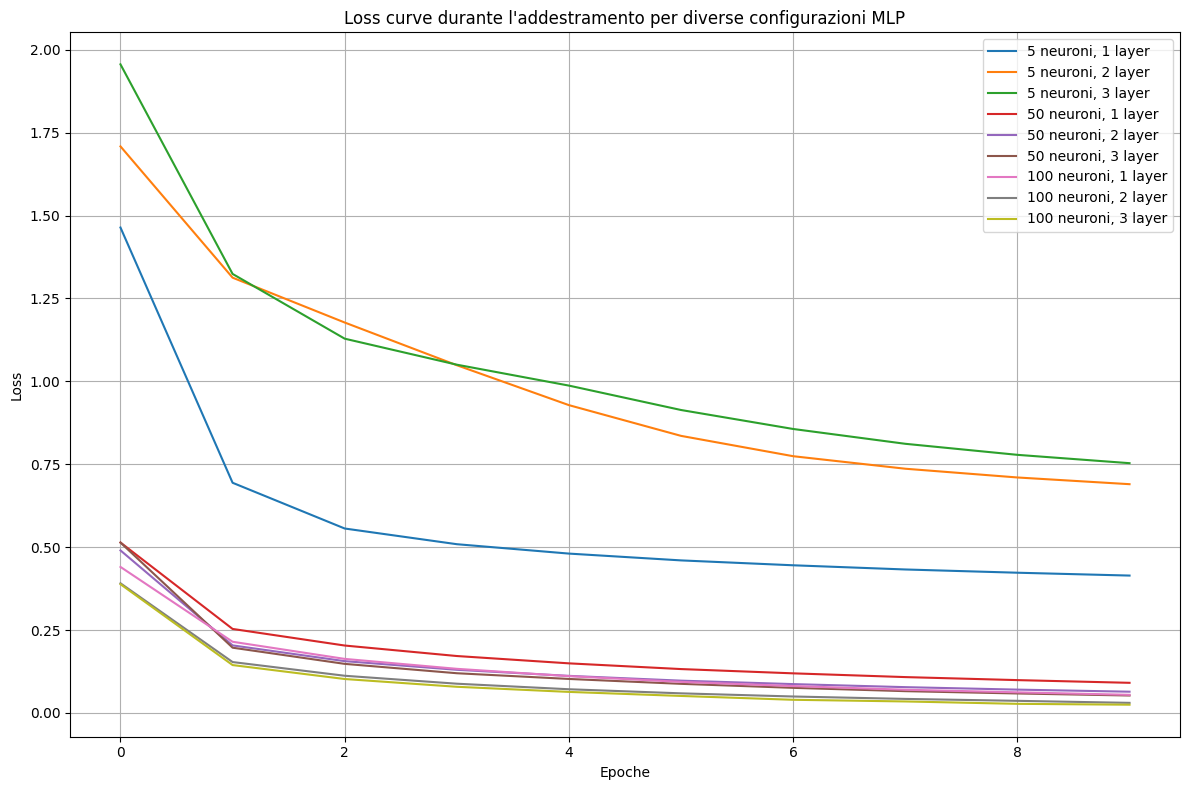

In [38]:
plt.figure(figsize=(12, 8))

# Funzione ausiliaria per stampare ogni curva
def plot_loss_curve(model, label):
    plt.plot(range(len(model.loss_curve_)), model.loss_curve_, label=label)

# Traccia le curve per ogni modello
plot_loss_curve(MLP_5_1,   "5 neuroni, 1 layer")
plot_loss_curve(MLP_5_2,   "5 neuroni, 2 layer")
plot_loss_curve(MLP_5_3,   "5 neuroni, 3 layer")

plot_loss_curve(MLP_50_1,  "50 neuroni, 1 layer")
plot_loss_curve(MLP_50_2,  "50 neuroni, 2 layer")
plot_loss_curve(MLP_50_3,  "50 neuroni, 3 layer")

plot_loss_curve(MLP_100_1, "100 neuroni, 1 layer")
plot_loss_curve(MLP_100_2, "100 neuroni, 2 layer")
plot_loss_curve(MLP_100_3, "100 neuroni, 3 layer")

# Etichette del grafico
plt.title("Loss curve durante l'addestramento per diverse configurazioni MLP")
plt.xlabel("Epoche")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Il modello più veloce è stato quello con 100 neuroni e 3 strati nascosti. Dal grafo si può pensare che continuando ad aumentare sia il numero di neuoroni sia il numero di strati, allora il modello convergerà più velocemente.

Anche per quanto riguarda l'accuratezza, il modello appena citato è stato quello con il valore migliore, 0.9768

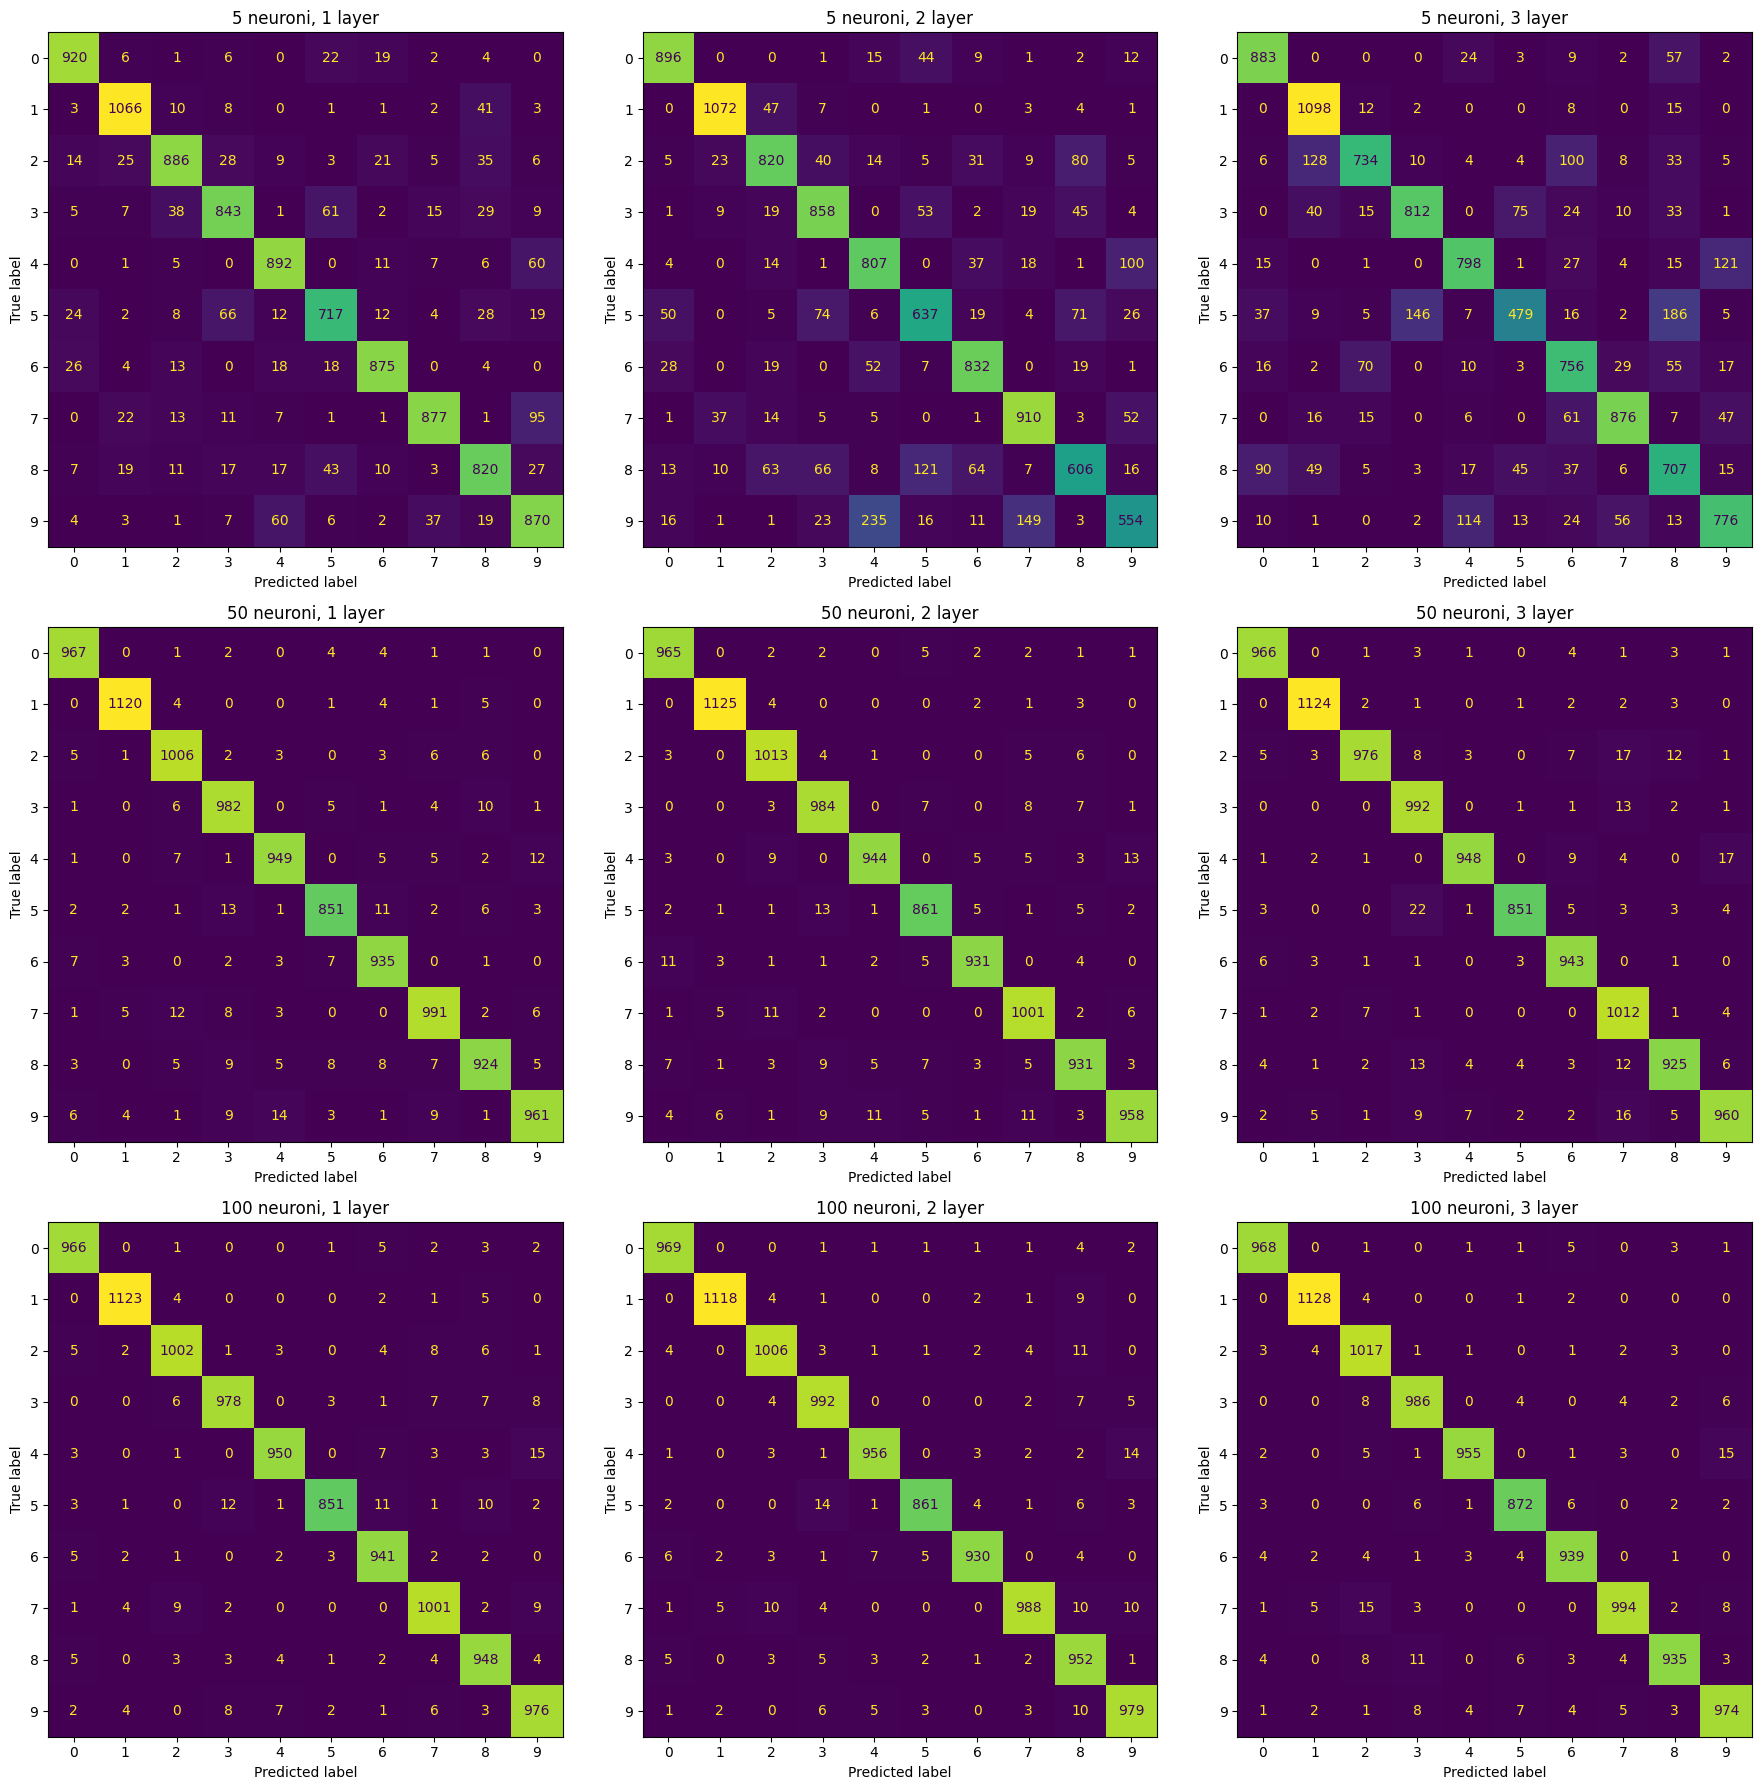

In [39]:
models = [
    (MLP_5_1, "5 neuroni, 1 layer"),
    (MLP_5_2, "5 neuroni, 2 layer"),
    (MLP_5_3, "5 neuroni, 3 layer"),
    (MLP_50_1, "50 neuroni, 1 layer"),
    (MLP_50_2, "50 neuroni, 2 layer"),
    (MLP_50_3, "50 neuroni, 3 layer"),
    (MLP_100_1, "100 neuroni, 1 layer"),
    (MLP_100_2, "100 neuroni, 2 layer"),
    (MLP_100_3, "100 neuroni, 3 layer"),
]

# Visualizza le matrici di confusione (3x3)
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
axs = axs.flatten()

for i, (model, title) in enumerate(models):
    y_pred = model.predict(x_te)
    cm = confusion_matrix(mnist_te_labels, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axs[i], colorbar=False)
    axs[i].set_title(title)

plt.tight_layout()
plt.show()

Per passare alla seconda parte della domanda del punto A, di seguito si mostra il cambiamento del modello MLP al variare di:


*   learning_rate (tasso di apprendimento)
*   max_iter (numero massimo di epoche)
*   activation (funzione di attivazione)



### Variazione del learning rate

| Learning rate | Accuratezza |
|---------------|-------------|
| 0.0001        | 0.9396      |
| 0.001         | 0.9713      |
| 0.01          | 0.9702      |
| 0.1           | 0.5764      |

In [40]:
# configurazione e addestramento dei modelli al variare del learning rate
learning_rates=[0.0001,0.001,0.01,0.1]
MLP_lr_dict = {}

for lr in learning_rates:
  MLP_lr = MLPClassifier(
      hidden_layer_sizes=(50,50),
      max_iter=10,
      random_state=42,
      learning_rate_init=lr
  )
  print("Addestramento modello MLP con learning rate=", lr)
  MLP_lr.fit(x_tr,mnist_tr_labels)
  MLP_lr_dict[lr] = MLP_lr

  # ~1m

Addestramento modello MLP con learning rate= 0.0001


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Addestramento modello MLP con learning rate= 0.001


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Addestramento modello MLP con learning rate= 0.01


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Addestramento modello MLP con learning rate= 0.1


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


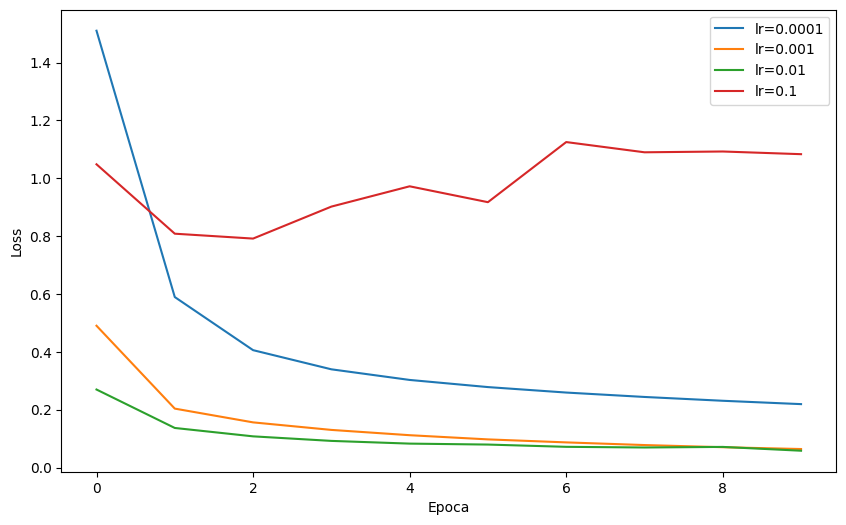

In [41]:
# grafico curva di loss
plt.figure(figsize=(10,6))
for lr, model in MLP_lr_dict.items():
  plt.plot(range(model.n_iter_), model.loss_curve_, label="lr="+str(lr))

plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.legend()
plt.show()

* 0.0001, il modello converge lentamente al punto di minimo. Fin troppo lentamente
* 0.001, il modello converge più velocemente al minimo rispetto al predecessore
* 0.01, il modello che converge più velocemente
* 0.1, il modello non sembra convergere, anzi, peggiora rispetto all'inizio



In [42]:
# score dei modelli
for lr, model in MLP_lr_dict.items():
    score = model.score(x_te, mnist_te_labels)
    print(f"Learning rate = {lr} --> Accuratezza = {score:.4f}")


Learning rate = 0.0001 --> Accuratezza = 0.9396
Learning rate = 0.001 --> Accuratezza = 0.9713
Learning rate = 0.01 --> Accuratezza = 0.9702
Learning rate = 0.1 --> Accuratezza = 0.5764


Learning rate = 0.0001 - Matrice di confusione:


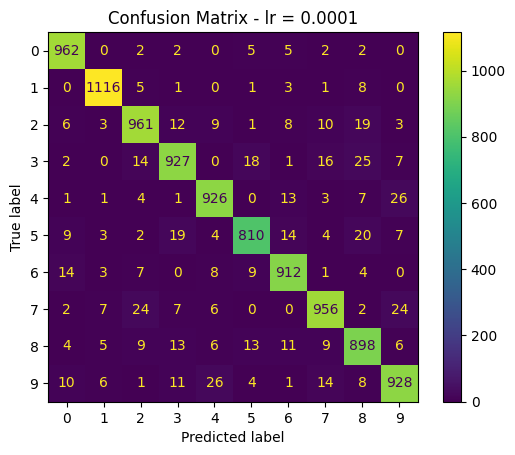

Learning rate = 0.001 - Matrice di confusione:


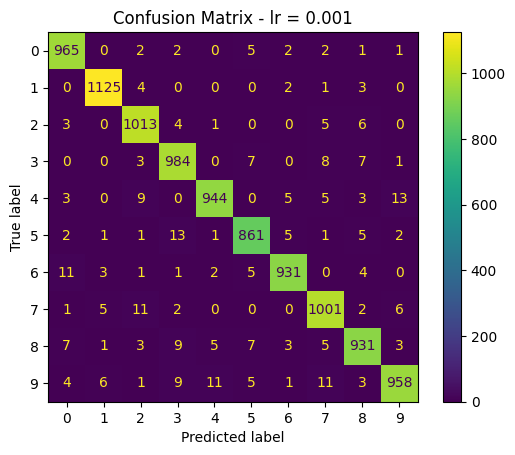

Learning rate = 0.01 - Matrice di confusione:


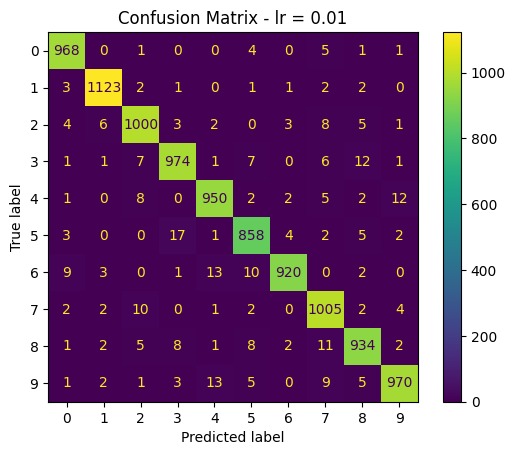

Learning rate = 0.1 - Matrice di confusione:


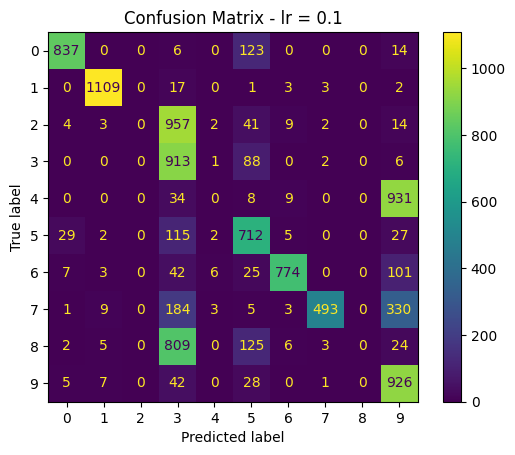

In [43]:
for lr, model in MLP_lr_dict.items():
    preds = model.predict(x_te)
    cm = confusion_matrix(mnist_te_labels, preds)
    print(f"Learning rate = {lr} - Matrice di confusione:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - lr = {lr}")
    plt.grid(False)
    plt.show()

### Variazione del max_iter

| max_iter | Accuratezza |
|----------|-------------|
| 1        | 0.9332      |
| 5        | 0.9651      |
| 10       | 0.9713      |
| 50       | 0.9678      |
| 100      | 0.9755      |
| 200      | 0.9755      |
| 300      | 0.9755      |

dopo 100 epoche il modello raggiunge il minimo quindi è inutile aumentarne il numero perchè l'accuratezza non cambia

In [44]:
# configurazione e addestramento dei modelli al variare del numero massimo di iterazioni~6m
max_iters = [1,5,10,50,100,200,300]
MLP_mi_dict = {}

for mi in max_iters:
  MLP_mi = MLPClassifier(
      hidden_layer_sizes=(50,50),
      max_iter=mi,
      random_state=42,
  )
  print("Addestramento modello MLP con max_iter=", mi)
  MLP_mi.fit(x_tr,mnist_tr_labels)
  MLP_mi_dict[mi] = MLP_mi


  # converge con un modello con max_iter = 100

Addestramento modello MLP con max_iter= 1


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Addestramento modello MLP con max_iter= 5


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Addestramento modello MLP con max_iter= 10


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Addestramento modello MLP con max_iter= 50


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Addestramento modello MLP con max_iter= 100
Addestramento modello MLP con max_iter= 200
Addestramento modello MLP con max_iter= 300


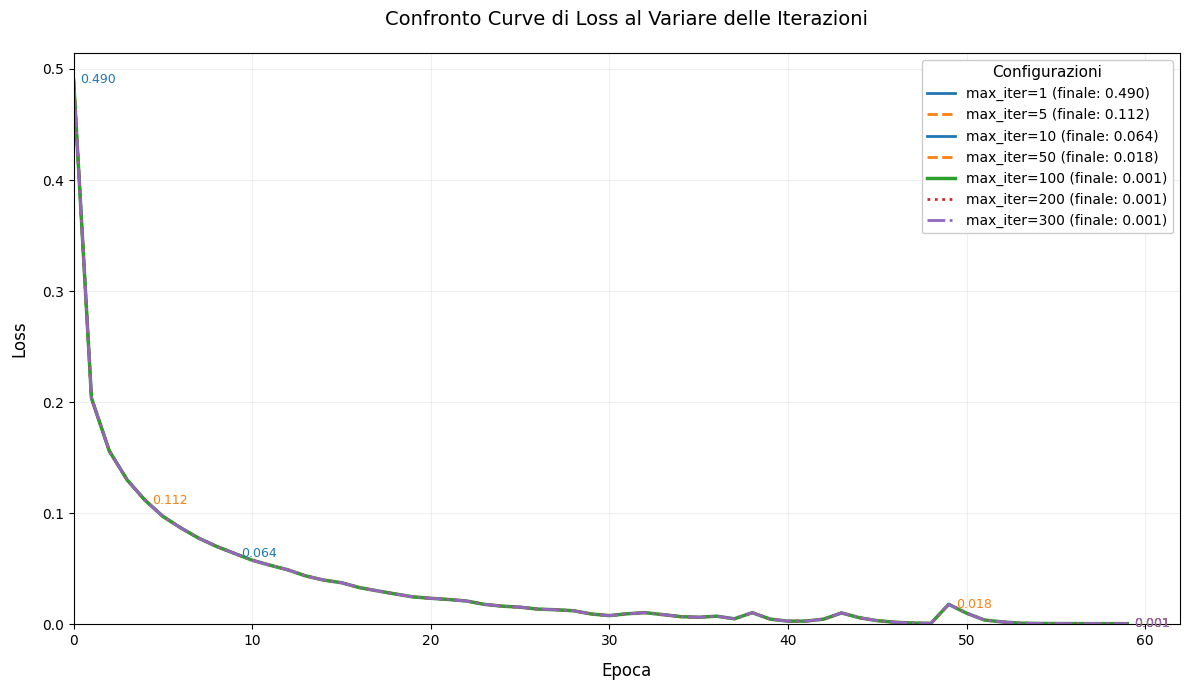

In [45]:
plt.figure(figsize=(12, 7))

# Stili distintivi per ogni curva
styles = {
    '1':  {'color': '#1f77b4', 'linestyle': '-',  'linewidth': 2},
    '5':  {'color': '#ff7f0e', 'linestyle': '--', 'linewidth': 2},
    '10':  {'color': '#1f77b4', 'linestyle': '-',  'linewidth': 2},
    '50':  {'color': '#ff7f0e', 'linestyle': '--', 'linewidth': 2},
    '100': {'color': '#2ca02c', 'linestyle': '-',  'linewidth': 2.5},
    '200': {'color': '#d62728', 'linestyle': ':',  'linewidth': 2},
    '300': {'color': '#9467bd', 'linestyle': '-.', 'linewidth': 2}
}

# Plot sovrapposto con stili personalizzati
for mi, model in MLP_mi_dict.items():
    plt.plot(model.loss_curve_,
             label=f'max_iter={mi} (finale: {model.loss_curve_[-1]:.3f})',
             **styles[str(mi)])

# Configurazione avanzata del grafico
plt.xlabel('Epoca', fontsize=12, labelpad=10)
plt.ylabel('Loss', fontsize=12, labelpad=10)
plt.title('Confronto Curve di Loss al Variare delle Iterazioni',
          fontsize=14, pad=20)

# Legenda migliorata
plt.legend( loc='upper right',framealpha=1,title='Configurazioni',title_fontsize=11)

# Griglia e limiti assi
plt.grid(True, alpha=0.2)
plt.xlim(left=0)
plt.ylim(bottom=0)

# Aggiunta valore finale con frecce
for mi, model in MLP_mi_dict.items():
    x_pos = len(model.loss_curve_) - 1
    y_pos = model.loss_curve_[-1]
    plt.annotate(f'{y_pos:.3f}',
                 xy=(x_pos, y_pos),
                 xytext=(5, 0),
                 textcoords='offset points',
                 color=styles[str(mi)]['color'],
                 fontsize=9,
                 va='center')

plt.tight_layout()
plt.show()

In [46]:
# score output
for mi, model in MLP_mi_dict.items():
    score = model.score(x_te, mnist_te_labels)
    print(f"max_iter = {mi} --> Accuratezza = {score:.4f}")

max_iter = 1 --> Accuratezza = 0.9332
max_iter = 5 --> Accuratezza = 0.9651
max_iter = 10 --> Accuratezza = 0.9713
max_iter = 50 --> Accuratezza = 0.9678
max_iter = 100 --> Accuratezza = 0.9755
max_iter = 200 --> Accuratezza = 0.9755
max_iter = 300 --> Accuratezza = 0.9755


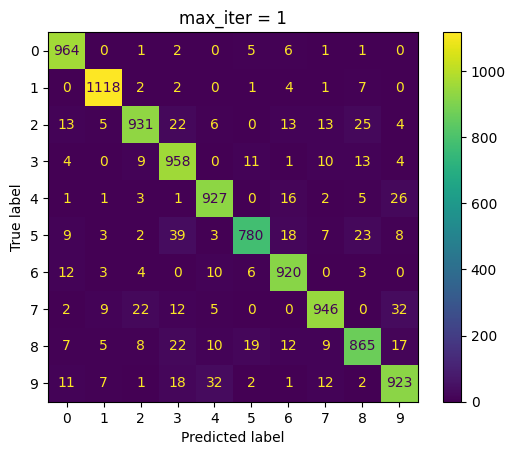

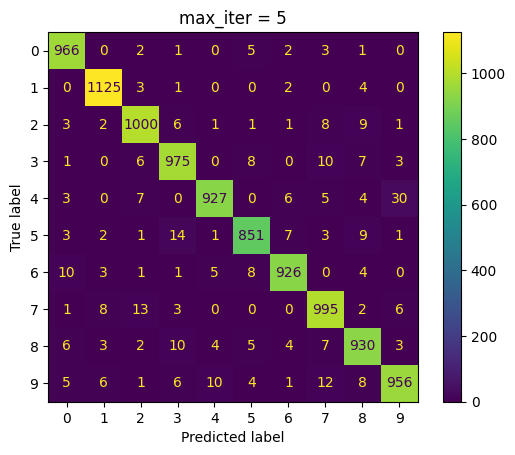

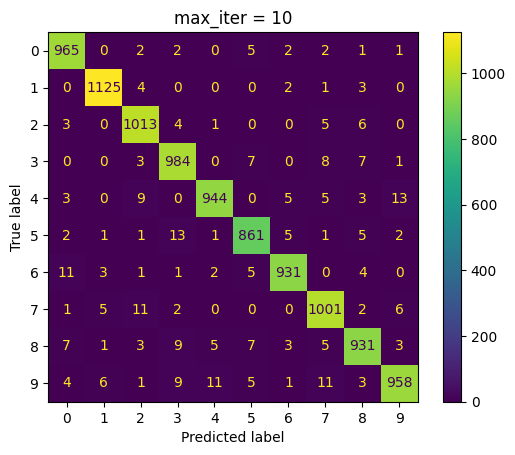

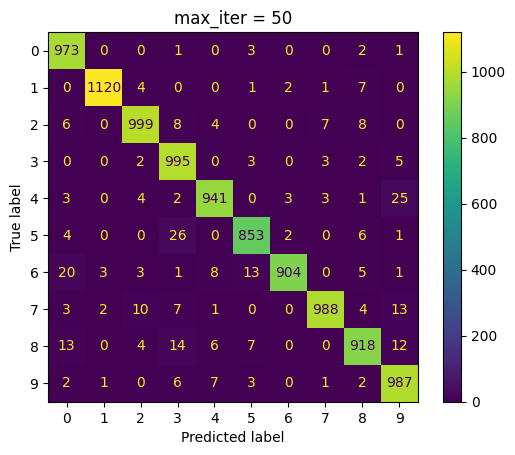

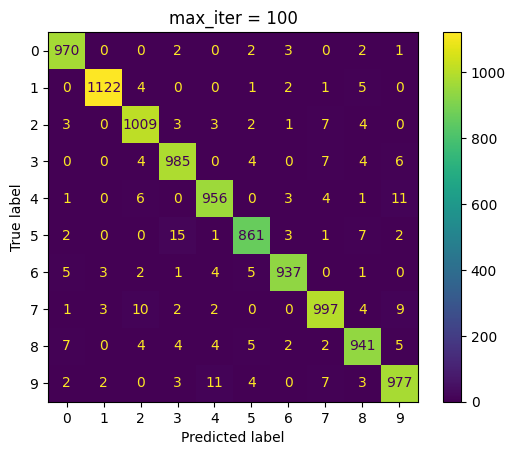

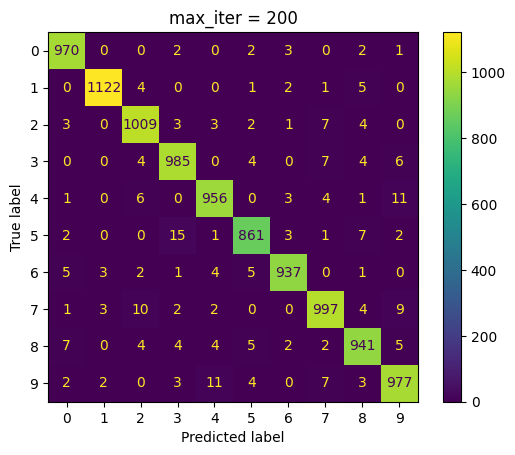

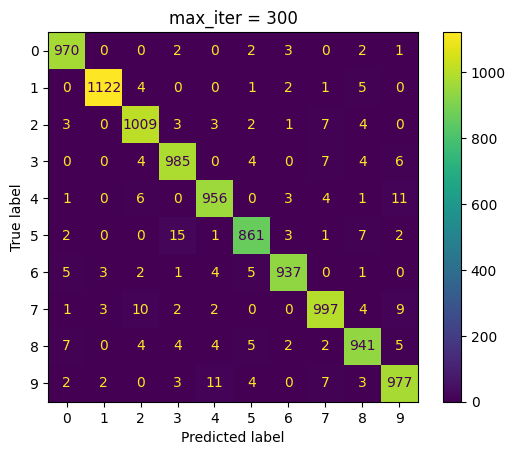

In [47]:
# matrici di confusione

for mi, model in MLP_mi_dict.items():
    preds = model.predict(x_te)
    cm = confusion_matrix(mnist_te_labels, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"max_iter = {mi}")
    plt.grid(False)
    plt.show()

### Variazione della funzione di attivazione

| max_iter    | activation | Accuratezza |
|-------------|------------|-------------|
| 100         | relu       | 0.9755      |
| 100         | tanh       | 0.9742      |

In [48]:
# configurazione e addestramento di due modelli con diversa funzione di attivazione
activations=["relu", "tanh"]
MLP_act_dict = {}
for a in activations:
  MLP_act = MLPClassifier(
      hidden_layer_sizes=(50,50),
      max_iter=100,
      random_state=42,
      activation=a
  )
  print("Addestramento modello MLP con activation =", a)
  MLP_act.fit(x_tr,mnist_tr_labels)
  MLP_act_dict[a] = MLP_act

# tempo impiegato = ~4min

Addestramento modello MLP con activation = relu
Addestramento modello MLP con activation = tanh


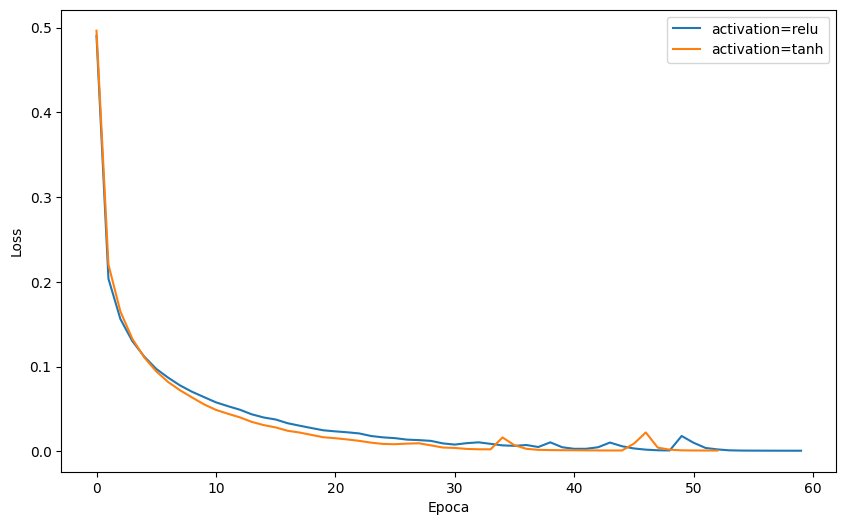

In [49]:
# grafico curva di loss
plt.figure(figsize=(10,6))
for a, model in MLP_act_dict.items():
  plt.plot(range(model.n_iter_), model.loss_curve_, label="activation="+str(a))

plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.legend()
plt.show()

Il comportamento del modello al variare delle funzioni di attivazione è simile. Entrambi sono stabili per le prime 30 epoche, poì iniziano ad effettuare dei "balzi".

In [50]:
# punteggio score
for a, model in MLP_act_dict.items():
  score = model.score(x_te, mnist_te_labels)
  print(f"activation = {a} --> Accuratezza = {score:.4f}")


activation = relu --> Accuratezza = 0.9755
activation = tanh --> Accuratezza = 0.9742


##CNN

Dalla mail che ho scritto all'assistente di Laboratorio (Sebastiano Cinetto) mi è stato confermato che su questo punto (A) bastasse fare le simulazioni su MLP. Di seguito ho fatto solo una prova di come configurare ed addestrare un modello CNN.

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt

class SimpleCNN(nn.Module):
    def __init__(self, num_conv_layers=2, num_filters=16):
        super(SimpleCNN, self).__init__()
        self.num_conv_layers = num_conv_layers
        self.num_filters = num_filters

        layers = []
        in_channels = 1
        for _ in range(num_conv_layers):
            layers.append(nn.Conv2d(in_channels, num_filters, kernel_size=3, padding=1))
            layers.append(nn.ReLU())
            layers.append(nn.MaxPool2d(2))
            in_channels = num_filters

        self.conv = nn.Sequential(*layers)

        # Calcolo automatico della dimensione dopo il conv
        with torch.no_grad():
            dummy = torch.zeros(1, 1, 28, 28)
            dummy_out = self.conv(dummy)
            self.flat_dim = dummy_out.view(1, -1).shape[1]

        self.fc = nn.Linear(self.flat_dim, 10)

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)



In [52]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

In [53]:
def train_and_evaluate(num_layers, num_filters, epochs=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = SimpleCNN(num_layers, num_filters).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    start = time.time()
    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    training_time = time.time() - start

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    total_loss = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    avg_loss = total_loss / len(test_loader)

    return accuracy, avg_loss, training_time


In [54]:
configs = [
    {"layers": 1, "filters": 8},
    {"layers": 2, "filters": 16},
    {"layers": 2, "filters": 32},
    {"layers": 3, "filters": 32},
    {"layers": 3, "filters": 64},
]

results = []

for cfg in configs:
    print(f"Training: {cfg}")
    acc, loss, t = train_and_evaluate(cfg["layers"], cfg["filters"])
    results.append((cfg["layers"], cfg["filters"], acc, loss, t))


Training: {'layers': 1, 'filters': 8}
Training: {'layers': 2, 'filters': 16}
Training: {'layers': 2, 'filters': 32}
Training: {'layers': 3, 'filters': 32}
Training: {'layers': 3, 'filters': 64}


In [55]:
print("\n| Layers | Filters | Accuracy | Loss | Training Time (s) |")
print("|--------|---------|----------|------|--------------------|")
for r in results:
    print(f"| {r[0]:<6} | {r[1]:<7} | {r[2]:.4f}   | {r[3]:.4f} | {r[4]:>18.2f} |")


| Layers | Filters | Accuracy | Loss | Training Time (s) |
|--------|---------|----------|------|--------------------|
| 1      | 8       | 0.9787   | 0.0691 |             108.76 |
| 2      | 16      | 0.9847   | 0.0481 |             171.56 |
| 2      | 32      | 0.9883   | 0.0354 |             285.09 |
| 3      | 32      | 0.9889   | 0.0320 |             309.93 |
| 3      | 64      | 0.9912   | 0.0299 |             652.83 |


| Layers | Filters | Accuracy | Loss | Training Time (s) |
|--------|---------|----------|------|--------------------|
| 1      | 8       | 0.9785   | 0.0689 |             143.30 |
| 2      | 16      | 0.9850   | 0.0424 |             182.28 |
| 2      | 32      | 0.9893   | 0.0341 |             343.88 |
| 3      | 32      | 0.9912   | 0.0268 |             380.67 |
| 3      | 64      | 0.9920   | 0.0293 |             721.99 |

# B

* Quali sono le cifre più difficili da riconoscere per il modello MLP (suggerimento: usare la matrice di confusione)?
* Visualizzare qualche esempio di pattern classificato in modo errato. [1 punto]

## Con modello non ancora addestrato

Accuratezza MLP con 100 neuroni e 3 strati nascosti: 0.9819

In [56]:
#configurazione di un modello e addestramento
MLP_100_3_B = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=50, random_state=42)
MLP_100_3_B.fit(x_tr, mnist_tr_labels)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=50, random_state=42)

In [57]:
#accuratezza del modello
score_MLP_100_3_B = MLP_100_3_B.score(x_te, mnist_te_labels)
print("Accuratezza MLP con 100 neuroni e 3 strati nascosti:", score_MLP_100_3_B)

Accuratezza MLP con 100 neuroni e 3 strati nascosti: 0.9819


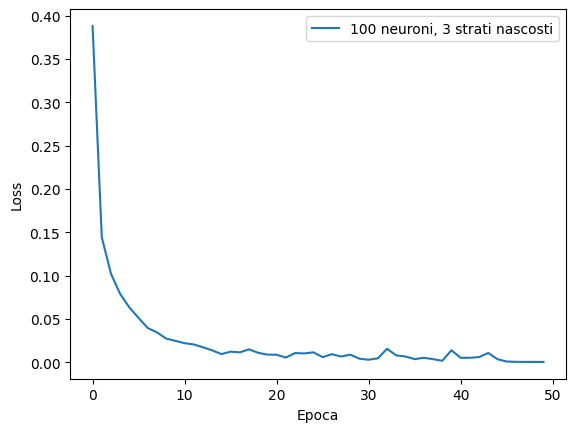

In [58]:
#curva di loss del modello
plt.plot(range(MLP_100_3_B.n_iter_), MLP_100_3_B.loss_curve_, label="100 neuroni, 3 strati nascosti")
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.legend()
plt.show()

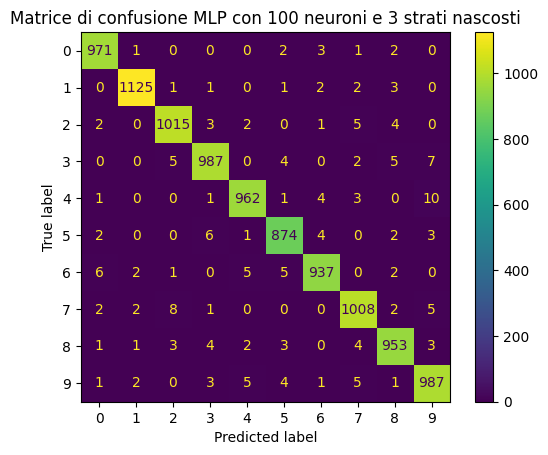

In [59]:
# matrice di confusione
y_pred_MLP_100_3_B = MLP_100_3_B.predict(x_te)
cm_MLP_100_3_B = confusion_matrix(mnist_te_labels, y_pred_MLP_100_3_B)
disp_MLP_100_3_B = ConfusionMatrixDisplay(confusion_matrix=cm_MLP_100_3_B)
disp_MLP_100_3_B.plot()
plt.title("Matrice di confusione MLP con 100 neuroni e 3 strati nascosti")
plt.show()

In [60]:
# Calcola predizioni e matrice di confusione
preds = y_pred_MLP_100_3_B
cm = confusion_matrix(mnist_te_labels, preds)

# Trova l'errore più frequente (escludendo la diagonale)
np.fill_diagonal(cm, -1)  # Esclude le predizioni corrette
true_label, predicted_label = np.unravel_index(np.argmax(cm), cm.shape)

print(f"Il modello confonde più spesso il numero {true_label} con {predicted_label}")
print(f"Numero di errori: {cm[true_label, predicted_label]}")

Il modello confonde più spesso il numero 4 con 9
Numero di errori: 10


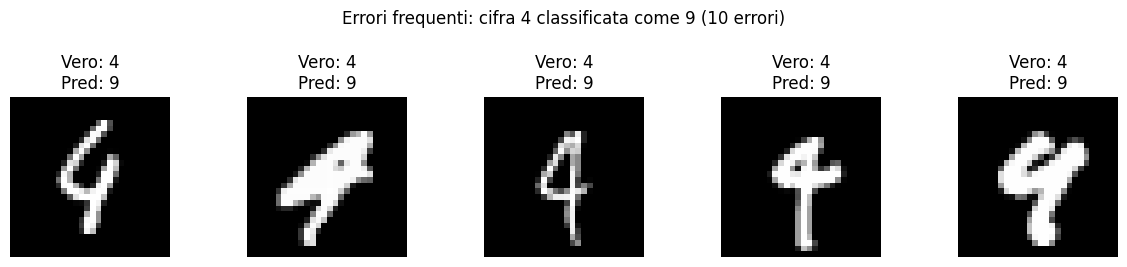

Indici degli esempi: [ 115  447 1242 2053 2130]


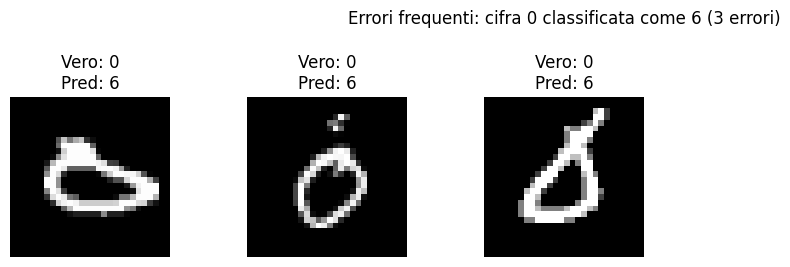

Indici degli esempi: [ 717 7216 8325]


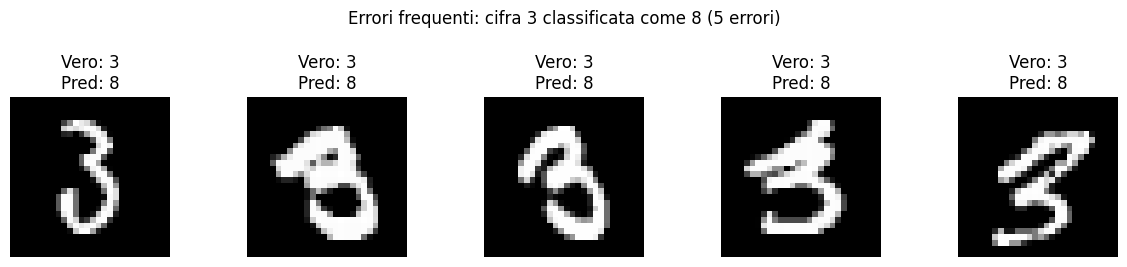

Indici degli esempi: [1913 5955 5973 8277 9944]


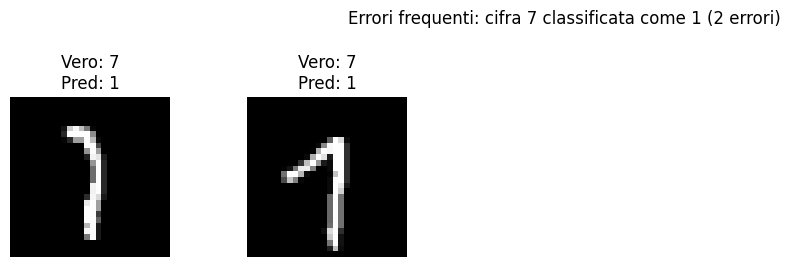

Indici degli esempi: [1260 4027]


In [61]:
# Configurazione
error_pairs = [(4, 9), (0, 6), (3, 8), (7, 1)]  # Coppie da analizzare
n_examples = 5  # Esempi per coppia, se presenti

for true_label, predicted_label in error_pairs:
    # Filtra gli errori specifici
    errors_mask = (mnist_te_labels == true_label) & (preds == predicted_label)
    error_images = x_te[errors_mask]
    error_indices = np.where(errors_mask)[0]

    # Salta se non ci sono errori
    if len(error_images) == 0:
        print(f"\nNessun errore {true_label}→{predicted_label} trovato")
        continue

    # Visualizzazione
    plt.figure(figsize=(12, 2.5))
    plt.suptitle(f'Errori frequenti: cifra {true_label} classificata come {predicted_label} ({len(error_images)} errori)',
                 fontsize=12, y=1.05)

    for i in range(min(n_examples, len(error_images))):
        plt.subplot(1, n_examples, i+1)
        plt.imshow(error_images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Vero: {true_label}\nPred: {predicted_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Stampa gli indici degli esempi (utile per debug)
    print(f"Indici degli esempi: {error_indices[:n_examples]}")

## Con vari modelli del punto A

Ovviamente, la difficoltà del modello nel predire correttamente un numero varia a seconda di come il modello è stato configurato e di quanto addestramento ha  ricevuto.

Di seguito vari modelli del punto A con le loro matrici di confusione. Più aumentiamo il numero di neuroni e numero di strati, minori saranno le predizioni errate del modello.



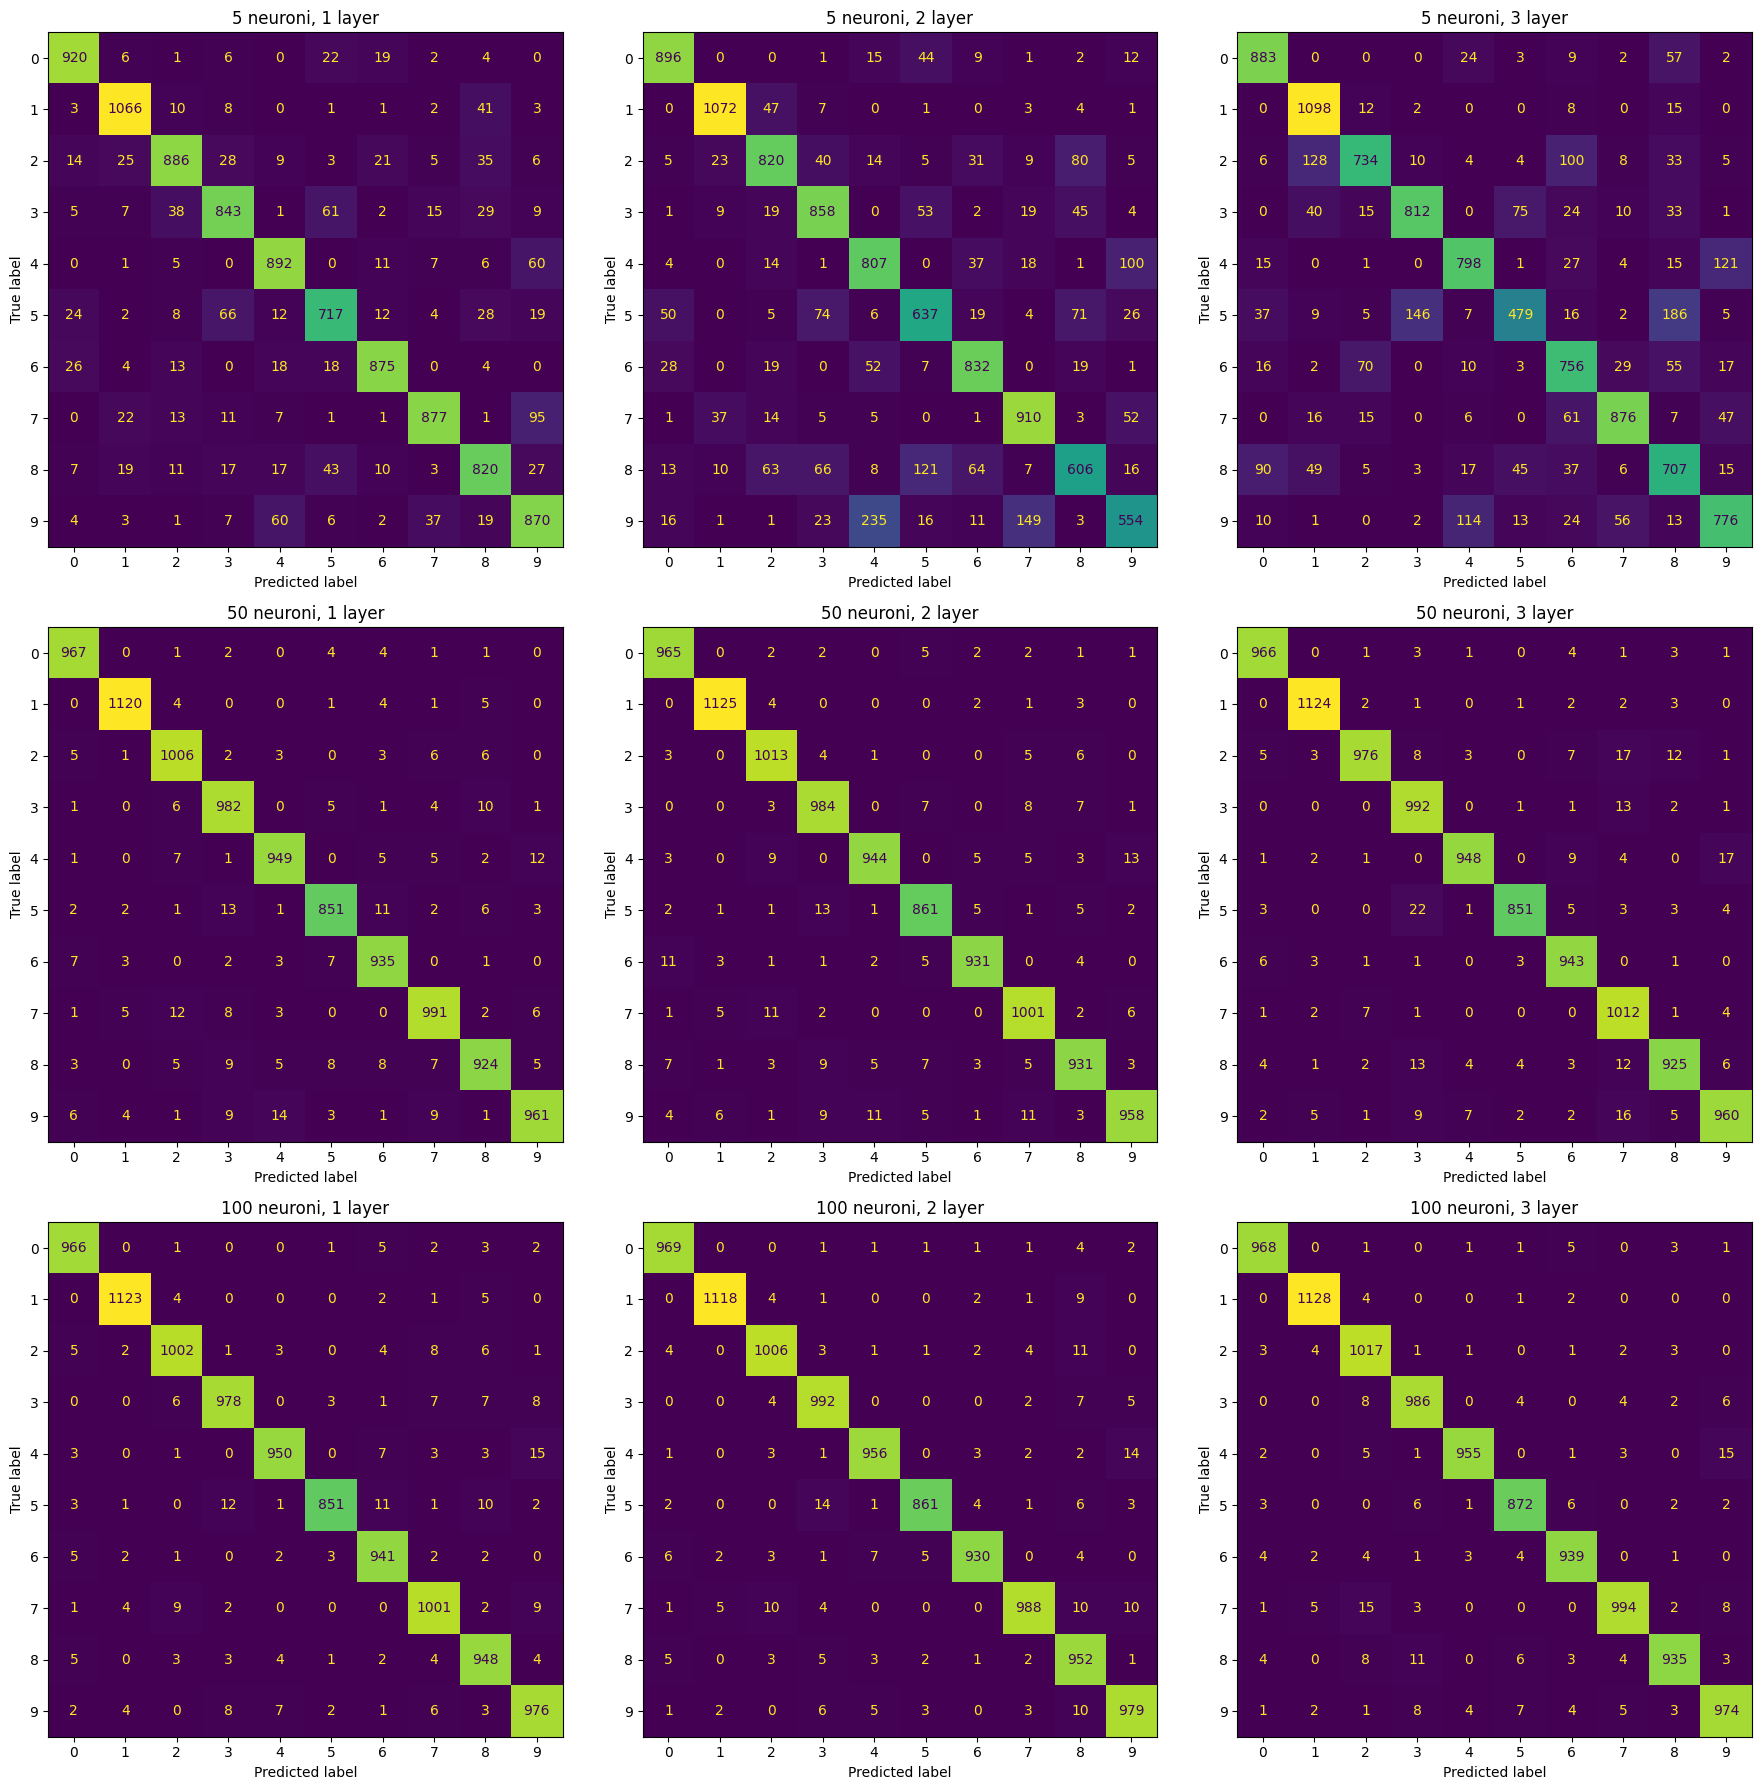

In [62]:
models = [
    (MLP_5_1, "5 neuroni, 1 layer"),
    (MLP_5_2, "5 neuroni, 2 layer"),
    (MLP_5_3, "5 neuroni, 3 layer"),
    (MLP_50_1, "50 neuroni, 1 layer"),
    (MLP_50_2, "50 neuroni, 2 layer"),
    (MLP_50_3, "50 neuroni, 3 layer"),
    (MLP_100_1, "100 neuroni, 1 layer"),
    (MLP_100_2, "100 neuroni, 2 layer"),
    (MLP_100_3, "100 neuroni, 3 layer"),
]

# Visualizza le matrici di confusione (3x3)
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
axs = axs.flatten()

for i, (model, title) in enumerate(models):
    y_pred = model.predict(x_te)
    cm = confusion_matrix(mnist_te_labels, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axs[i], colorbar=False)
    axs[i].set_title(title)

plt.tight_layout()
plt.show()

In [63]:
print("ERRORI PRINCIPALI PER MODELLO:")
print("---------------------------------")

for model, name in models:
    preds = model.predict(x_te)
    cm = confusion_matrix(mnist_te_labels, preds)

    # Trova l'errore più frequente (ignorando la diagonale)
    np.fill_diagonal(cm, -1)
    true, predicted = np.unravel_index(np.argmax(cm), cm.shape)
    count = cm[true, predicted]

    print(f"{name: <20} | Scambia {true}→{predicted} | Errori: {count: <3} ")

ERRORI PRINCIPALI PER MODELLO:
---------------------------------
5 neuroni, 1 layer   | Scambia 7→9 | Errori: 95  
5 neuroni, 2 layer   | Scambia 9→4 | Errori: 235 
5 neuroni, 3 layer   | Scambia 5→8 | Errori: 186 
50 neuroni, 1 layer  | Scambia 9→4 | Errori: 14  
50 neuroni, 2 layer  | Scambia 4→9 | Errori: 13  
50 neuroni, 3 layer  | Scambia 5→3 | Errori: 22  
100 neuroni, 1 layer | Scambia 4→9 | Errori: 15  
100 neuroni, 2 layer | Scambia 4→9 | Errori: 14  
100 neuroni, 3 layer | Scambia 4→9 | Errori: 15  


## Risposta


una volta che il modello raggiunge una stabilità, il numero che fa più fatica a riconoscere sembra essere il 4 che scambia spesso con il 9.

di seguito, la tabella degli errori  


| Configurazione      | Scambio Frequente | Errori |
|---------------------|-------------------|--------|
| 5 neuroni, 1 layer  | 7→9               | 95     |
| 5 neuroni, 2 layer  | 9→4               | 235    |
| 5 neuroni, 3 layer  | 5→8               | 186    |
| 50 neuroni, 1 layer | 9→4               | 14     |
| 50 neuroni, 2 layer | 4→9               | 13     |
| 50 neuroni, 3 layer | 5→3               | 22     |
| 100 neuroni, 1 layer| 4→9               | 15     |
| 100 neuroni, 2 layer| 4→9               | 14     |
| 100 neuroni, 3 layer| 4→9               | 15     |

#C
* Come cambia l'accuratezza di riconoscimento sui pattern di test se viene gradualmente introdotto più rumore
nelle immagini?

Provare a generare alcune curve psicometriche, che mostrano come cala l'accuratezza all'aumentare del rumore inserito nei dati di test (si può prendere spunto dalla metodologia usata nell'articolo
Testolin, Stoianov and Zorzi (2017), Nature Human Behavior). [1 punto]

## Download Dataset

In [64]:
# Scarica il dataset, tr=training te=test
mnist_tr = MNIST(root="./data", train=True, download=True)
mnist_te = MNIST(root="./data", train=False, download=True)
mnist_tr, mnist_tr_labels = mnist_tr.data.numpy(), mnist_tr.targets.numpy()
mnist_te, mnist_te_labels = mnist_te.data.numpy(), mnist_te.targets.numpy()
x_tr = mnist_tr.reshape(len(mnist_tr), 28*28)
x_te = mnist_te.reshape(len(mnist_te), 28*28)
x_tr = x_tr/255
x_te = x_te/255

## Configurazione e addestramento modello di riferimento

In [65]:
#~3m
MLP_100_3_C = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=50, random_state=42)
MLP_100_3_C.fit(x_tr, mnist_tr_labels)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=50, random_state=42)

## Accuratezza solo con rumore casuale

| Rumore (σ) | Accuratezza |
|------------|-------------|
| 0.00       | 0.9724      |
| 0.10       | 0.9742      |
| 0.15       | 0.9725      |
| 0.20       | 0.9656      |
| 0.25       | 0.9547      |
| 0.30       | 0.9327      |
| 0.35       | 0.8932      |
| 0.40       | 0.8336      |
| 0.45       | 0.7509      |
| 0.50       | 0.6790      |
| 0.55       | 0.5930      |
| 0.60       | 0.5224      |
| 0.65       | 0.4600      |
| 0.70       | 0.3981      |
| 0.75       | 0.3588      |
| 0.80       | 0.3251      |
| 0.85       | 0.2898      |
| 0.90       | 0.2688      |
| 0.95       | 0.2458      |
| 1.00       | 0.2337      |

In [66]:
#accuratezza del modello senza l'aggiunta di rumore
score_MLP_100_3_C = MLP_100_3_C.score(x_te, mnist_te_labels)
print("Accuratezza senza aggiunta del rumore ai dati: ", score_MLP_100_3_C)

Accuratezza senza aggiunta del rumore ai dati:  0.9819


Funzione per aggiungere rumore gaussiano ai dati

In [67]:
def aggiungi_rumore_gaussiano(x_te, noise_std):
  """
  La funzione aggiunge rumore gaussiano ai dati di x_te
  x = array numpy
  noise_std = deviazione standard del rumore gaussiano

  ritorna x_te con rumore gaussiano
  """
  noise = np.random.normal(loc=0.0, scale = noise_std, size=x_te.shape)
  x_noisy = x_te + noise
  x_noisy = np.clip(x_noisy, 0.0, 1.0)
  return x_noisy


In [68]:
noise = [0.00,
         0.10,
         0.15,
         0.20,
         0.25,
         0.30,
         0.35,
         0.40,
         0.45,
         0.50,
         0.55,
         0.60,
         0.65,
         0.70,
         0.75,
         0.80,
         0.85,
         0.90,
         0.95,
         1.0]
accuracies = []
for i in noise:
  x_te_noisy = aggiungi_rumore_gaussiano(x_te, i)
  score_MLP_100_3_C = MLP_100_3_C.score(x_te_noisy, mnist_te_labels)
  accuracies.append(score_MLP_100_3_C)
  print("Accuratezza con rumore gaussiano di ", i, ": ", score_MLP_100_3_C)

Accuratezza con rumore gaussiano di  0.0 :  0.9819
Accuratezza con rumore gaussiano di  0.1 :  0.9749
Accuratezza con rumore gaussiano di  0.15 :  0.9588
Accuratezza con rumore gaussiano di  0.2 :  0.9127
Accuratezza con rumore gaussiano di  0.25 :  0.8468
Accuratezza con rumore gaussiano di  0.3 :  0.7697
Accuratezza con rumore gaussiano di  0.35 :  0.6989
Accuratezza con rumore gaussiano di  0.4 :  0.6285
Accuratezza con rumore gaussiano di  0.45 :  0.5581
Accuratezza con rumore gaussiano di  0.5 :  0.5
Accuratezza con rumore gaussiano di  0.55 :  0.4511
Accuratezza con rumore gaussiano di  0.6 :  0.4094
Accuratezza con rumore gaussiano di  0.65 :  0.3711
Accuratezza con rumore gaussiano di  0.7 :  0.3407
Accuratezza con rumore gaussiano di  0.75 :  0.3153
Accuratezza con rumore gaussiano di  0.8 :  0.2945
Accuratezza con rumore gaussiano di  0.85 :  0.2672
Accuratezza con rumore gaussiano di  0.9 :  0.2551
Accuratezza con rumore gaussiano di  0.95 :  0.2397
Accuratezza con rumore ga

### Grafico curva psiscometrica

Curva psicometrica:
* asse x = livello del rumore
* asse y = accuratezza del modello

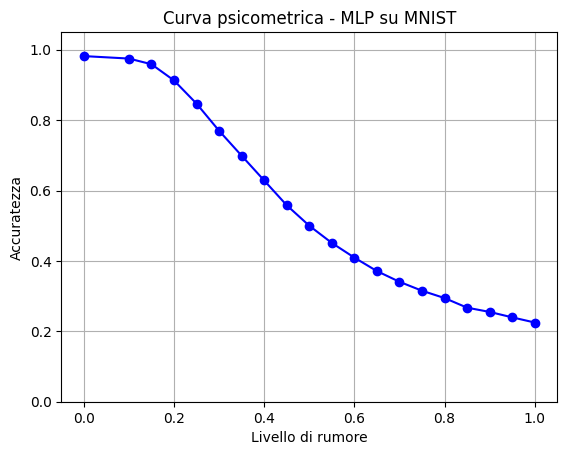

In [69]:
plt.plot(noise, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel("Livello di rumore")
plt.ylabel("Accuratezza")
plt.title("Curva psicometrica - MLP su MNIST")
plt.grid(True)
plt.ylim(0, 1.05)
plt.show()


## Accuratezza con diversi tipi di rumore

Prendendo spunto dall'articolo citato nella consegna, provo ad "annerire" e a "sbiancare" i dati

In [70]:
def scurisci_immagini(x, livello_scurimento):
  x_scuro = np.clip(x - livello_scurimento, 0.0,1.0)
  return x_scuro

def sciarisci_immagini(x, livello_schiarimento):
  x_chiaro = np.clip(x + livello_schiarimento, 0.0,1.0)
  return x_chiaro

In [71]:



white_levels = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
x_te_whited = []
accuracies_w = []

dark_levels = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
x_te_blacked = []
accuracies_b = []

for d in dark_levels:
  x_te_blacked = scurisci_immagini(x_te, d)
  score_MLP_100_3_C = MLP_100_3_C.score(x_te_blacked, mnist_te_labels)
  accuracies_b.append(score_MLP_100_3_C)
  print("Accuratezza con scurimento di ", d, ": ", score_MLP_100_3_C)

for w in white_levels:
  x_te_whited = sciarisci_immagini(x_te, w)
  score_MLP_100_3_C = MLP_100_3_C.score(x_te_whited, mnist_te_labels)
  accuracies_w.append(score_MLP_100_3_C)
  print("Accuratezza con schiarimento di ", w, ": ", score_MLP_100_3_C)



Accuratezza con scurimento di  0.1 :  0.9815
Accuratezza con scurimento di  0.2 :  0.9798
Accuratezza con scurimento di  0.3 :  0.9792
Accuratezza con scurimento di  0.4 :  0.9766
Accuratezza con scurimento di  0.5 :  0.9717
Accuratezza con scurimento di  0.6 :  0.9604
Accuratezza con scurimento di  0.7 :  0.9335
Accuratezza con scurimento di  0.8 :  0.8424
Accuratezza con scurimento di  0.9 :  0.5573
Accuratezza con scurimento di  1.0 :  0.0892
Accuratezza con schiarimento di  0.1 :  0.9307
Accuratezza con schiarimento di  0.2 :  0.7446
Accuratezza con schiarimento di  0.3 :  0.5203
Accuratezza con schiarimento di  0.4 :  0.3918
Accuratezza con schiarimento di  0.5 :  0.2952
Accuratezza con schiarimento di  0.6 :  0.2045
Accuratezza con schiarimento di  0.7 :  0.1178
Accuratezza con schiarimento di  0.8 :  0.0918
Accuratezza con schiarimento di  0.9 :  0.0892
Accuratezza con schiarimento di  1.0 :  0.0892


### Curva psicometrica

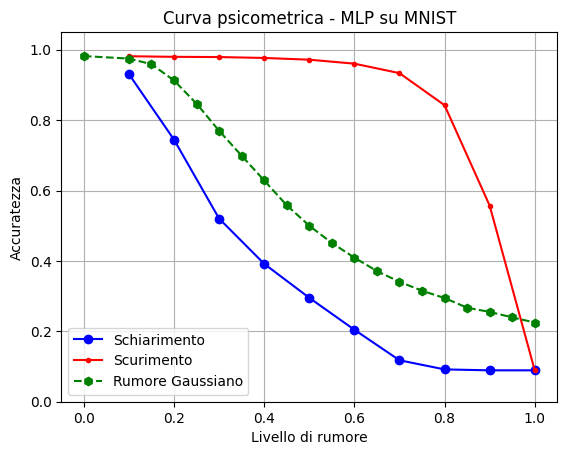

In [72]:
plt.plot(white_levels, accuracies_w, marker='o', linestyle='-', color='blue', label='Schiarimento')
plt.plot(dark_levels, accuracies_b, marker='.', linestyle='-', color='red', label='Scurimento')
plt.plot(noise, accuracies, marker='h', linestyle='--', color='green', label='Rumore Gaussiano')
plt.xlabel("Livello di rumore")
plt.ylabel("Accuratezza")
plt.title("Curva psicometrica - MLP su MNIST")
plt.grid(True)
plt.ylim(0, 1.05)
plt.legend()
plt.show()


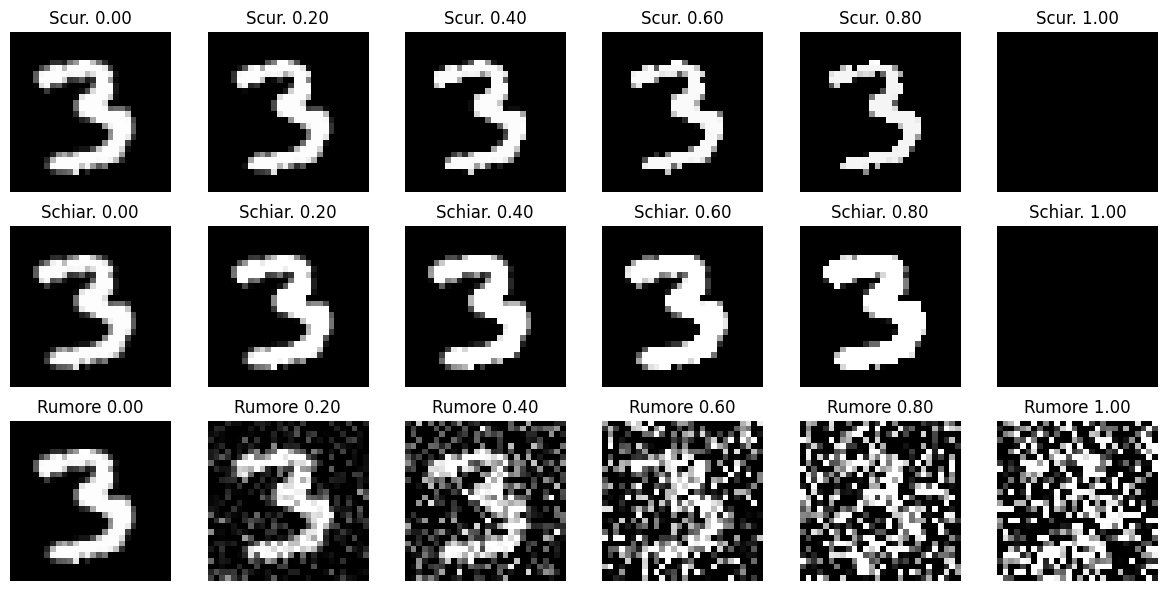

In [73]:
img = x_te[500].reshape(28, 28)
levels = np.linspace(0, 1.0, 6)  # 6 livelli: da 0 a 0.8

img_darkened = []
img_whitened = []
img_random = []

def darken_img(img,i):
  return np.clip(img - i, 0.0,1.0)

def lighten_img(img,i):
  return np.clip(img + i, 0.0,1.0)

def aggiungi_rumore_gaussiano(img, i):
    rumore = np.random.normal(loc=0.0, scale=i, size=img.shape)
    return np.clip(img + rumore, 0.0, 1.0)


# scurimento
for l in levels:
  img_d = darken_img(img, l)
  img_darkened.append(img_d)
# schiarimento
for l in levels:
  img_w = lighten_img(img, l)
  img_whitened.append(img_w)
# rumore gaussiano
for l in levels:
  img_r = aggiungi_rumore_gaussiano(img, l)
  img_random.append(img_r)
# mostra le immagini
fig, axs = plt.subplots(3, 6, figsize=(12, 6))


# Riga 0 – Scurimento
for i in range(6):
    axs[0, i].imshow(img_darkened[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f"Scur. {levels[i]:.2f}")

# Riga 1 – Schiarimento
for i in range(6):
    axs[1, i].imshow(img_whitened[i], cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f"Schiar. {levels[i]:.2f}")

# Riga 2 – Rumore gaussiano
for i in range(6):
    axs[2, i].imshow(img_random[i], cmap='gray')
    axs[2, i].axis('off')
    axs[2, i].set_title(f"Rumore {levels[i]:.2f}")

plt.tight_layout()
plt.show()


## Risposta


| Rumore  |  Gaussiano | Scurimento | Schiarimento |
|----|--------|--------|--------|
| 0.0| 0.9724 |    -   |    -   |
| 0.1| 0.9742 | 0.9720 | 0.9764 |
| 0.2| 0.9656 | 0.9710 | 0.9513 |
| 0.3| 0.9327 | 0.9703 | 0.7862 |
| 0.4| 0.8336 | 0.9680 | 0.4300 |
| 0.5| 0.6790 | 0.9653 | 0.2638 |
| 0.6| 0.5224 | 0.9625 | 0.1412 |
| 0.7| 0.3981 | 0.9546 | 0.0935 |
| 0.8| 0.3251 | 0.9292 | 0.0892 |
| 0.9| 0.2688 | 0.7842 | 0.0892 |
| 1.0| 0.2337 | 0.0982 | 0.0892 |


dal grafico è chiaro come "schiarire" l'immagine rende il modello molto meno affidabile rispetto allo scurimento.
Il rumore casuale (gaussiano) scende abbastanza linearmente.

Scurire l'immagine non riduce particolarmente l'affidabilità. Infatti, con rumore 0.8 l'affidabilità uguale a 0.9292. In seguito, a 0.9 di rumore questa precipita con affidabilità uguale a 0.7842.

Lo schiarire un'immagine, invece, porta ad una veloce perdita di affidabilità. Già con rumore uguale a 0.3 l'affidabilità scende a 0.7862.


#D
* Come cambia l’accuratezza di riconoscimento sui pattern di test se viene drasticamente ridotto il numero di pattern di training (es: tenendo solo il 10% dei pattern)? [1 punto]

Ok, fino ad ora abbiamo addestrato i vari modelli con 60'000 immagini. Proviamo ad addestrare alcuni modelli con un numero di pattern di training diverso tra loro.

## Download dataset

In [74]:
# Scarica il dataset, tr=training te=test
mnist_tr = MNIST(root="./data", train=True, download=True)
mnist_te = MNIST(root="./data", train=False, download=True)
mnist_tr, mnist_tr_labels = mnist_tr.data.numpy(), mnist_tr.targets.numpy()
mnist_te, mnist_te_labels = mnist_te.data.numpy(), mnist_te.targets.numpy()
x_tr = mnist_tr.reshape(len(mnist_tr), 28*28)
x_te = mnist_te.reshape(len(mnist_te), 28*28)
x_tr = x_tr/255
x_te = x_te/255

## Suddivisione del dataset

In [75]:
# Calcola le dimensioni dei subset
n_01 = int(len(x_tr) * 0.001)
n_1 = int(len(x_tr) * 0.01)
n_10 = int(len(x_tr) * 0.10)
n_30 = int(len(x_tr) * 0.30)
n_50 = int(len(x_tr) * 0.50)
n_70 = int(len(x_tr) * 0.70)
N_100 = len(x_tr)

# Sottocampioni sequenziali (non casuali)
x_tr_01, y_tr_01 = x_tr[:n_01], mnist_tr_labels[:n_01]
x_tr_1, y_tr_1 = x_tr[:n_1], mnist_tr_labels[:n_1]
x_tr_10, y_tr_10 = x_tr[:n_10], mnist_tr_labels[:n_10]
x_tr_30, y_tr_30 = x_tr[:n_30], mnist_tr_labels[:n_30]
x_tr_50, y_tr_50 = x_tr[:n_50], mnist_tr_labels[:n_50]
x_tr_70, y_tr_70 = x_tr[:n_70], mnist_tr_labels[:n_70]

print("# di elementi in x_tr_01", len(x_tr_01))
print("# di elementi in x_tr_1", len(x_tr_1))
print("# di elementi in x_tr_10", len(x_tr_10))
print("# di elementi in x_tr_30", len(x_tr_30))
print("# di elementi in x_tr_50", len(x_tr_50))
print("# di elementi in x_tr_70", len(x_tr_70))
print("# di elementi in x_tr", len(x_tr))

# di elementi in x_tr_01 60
# di elementi in x_tr_1 600
# di elementi in x_tr_10 6000
# di elementi in x_tr_30 18000
# di elementi in x_tr_50 30000
# di elementi in x_tr_70 42000
# di elementi in x_tr 60000


## Configurazione e addestramento dei modelli

In [76]:
MLP_01p = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=50, random_state=42)
MLP_1p = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=50, random_state=42)
MLP_10p = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=50, random_state=42)
MLP_30p = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=50, random_state=42)
MLP_50p = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=50, random_state=42)
MLP_70p = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=50, random_state=42)
MLP_100p = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=50, random_state=42)

MLP_01p.fit(x_tr_01, y_tr_01)
MLP_1p.fit(x_tr_1, y_tr_1)
MLP_10p.fit(x_tr_10, y_tr_10)
MLP_30p.fit(x_tr_30, y_tr_30)
MLP_50p.fit(x_tr_50, y_tr_50)
MLP_70p.fit(x_tr_70, y_tr_70)
MLP_100p.fit(x_tr, mnist_tr_labels)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=50, random_state=42)

In [77]:
score_MLP_01p = MLP_01p.score(x_te, mnist_te_labels)
score_MLP_1p = MLP_1p.score(x_te, mnist_te_labels)
score_MLP_10p = MLP_10p.score(x_te, mnist_te_labels)
score_MLP_30p = MLP_30p.score(x_te, mnist_te_labels)
score_MLP_50p = MLP_50p.score(x_te, mnist_te_labels)
score_MLP_70p = MLP_70p.score(x_te, mnist_te_labels)
score_MLP_100p = MLP_100p.score(x_te, mnist_te_labels)

print("Accuratezza con 0.1% di dati di addestramento: ", score_MLP_01p)
print("Accuratezza con 1% di dati di addestramento: ", score_MLP_1p)
print("Accuratezza con 10% di dati di addestramento: ", score_MLP_10p)
print("Accuratezza con 30% di dati di addestramento: ", score_MLP_30p)
print("Accuratezza con 50% di dati di addestramento: ", score_MLP_50p)
print("Accuratezza con 70% di dati di addestramento: ", score_MLP_70p)
print("Accuratezza con 100% di dati di addestramento: ", score_MLP_100p)

Accuratezza con 0.1% di dati di addestramento:  0.6499
Accuratezza con 1% di dati di addestramento:  0.8594
Accuratezza con 10% di dati di addestramento:  0.9461
Accuratezza con 30% di dati di addestramento:  0.9664
Accuratezza con 50% di dati di addestramento:  0.9741
Accuratezza con 70% di dati di addestramento:  0.963
Accuratezza con 100% di dati di addestramento:  0.9762


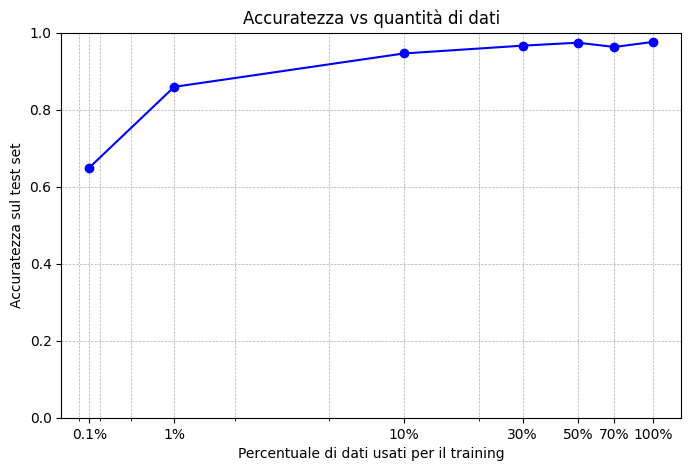

In [78]:
# Dati
percentuali = [0.1, 1.0, 10.0, 30.0, 50.0, 70.0, 100.0]
accuratezze = [score_MLP_01p, score_MLP_1p, score_MLP_10p,
               score_MLP_30p, score_MLP_50p, score_MLP_70p, score_MLP_100p]
# ValueError: 'jkj' is not a valid value for scale; supported values are 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'
# Grafico con asse X logaritmico
plt.figure(figsize=(8, 5))
plt.plot(percentuali, accuratezze, marker='o', linestyle='-', color='b')
plt.xscale('asinh')
plt.xlabel('Percentuale di dati usati per il training')
plt.ylabel('Accuratezza sul test set')
plt.title('Accuratezza vs quantità di dati')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0, 1)
plt.xticks([0.1, 1, 10, 30, 50, 70, 100], [f"{p}%" for p in [0.1, 1, 10, 30, 50, 70, 100]])
plt.show()

## Risposta

Risultati accuratezza con percentuale x di dati di addestramento

| Percentuale | Numero di Immagini | Accuratezza |
|-------------|--------------------|-------------|
| 0.1%        | 60                 | 0.6499      |
| 1%          | 600                | 0.8893      |
| 10%         | 6.000              | 0.9461      |
| 30%         | 18.000             | 0.9664      |
| 50%         | 30.000             | 0.9741      |
| 70%         | 42.000             | 0.9630      |
| 100%        | 60.000             | 0.9762      |

Come si può vedere dai risultati e dal grafico, il modello raggiunge una buona accuratezza anche con poche immagini di training. "Solo" 600 immagini fanno raggiungere al modello quasi il 90% di accuratezza.

L'accuratezza più bassa è stata ottenuta usando solo 60 immagini per il training e ha comunque portato al 64% di accuratezza. Non male se si pensa a quante poche immagini sono state utilizzate.

Globalmente, possiamo notare come l'accuratezza aumenti molto velocemente all'inizio e tendi ad appiattirsi poi con il crescere del numero di immagini di training.

Per qualche motivo usando il 70% di immagini si ha un leggero calo rispetto alla percentuale precedente del 50% ma l'accuratezza rimane pressoché simile.

In conclusione, con l'aumentare delle immagini di training il modello sembra migliorare costantemente e allo stesso tempo è in grado di generalizzare bene anche con un ridotto numero di immagini.

#E

Si può migliorare l'accuratezza di riconoscimento sui pattern di test rumorosi (curva psicometrica, punto c)
introducendo rumore anche nei pattern di training? [1 punto]

## Download DataSet


In [79]:
# Scarica il dataset, tr=training te=test
mnist_tr = MNIST(root="./data", train=True, download=True)
mnist_te = MNIST(root="./data", train=False, download=True)
mnist_tr, mnist_tr_labels = mnist_tr.data.numpy(), mnist_tr.targets.numpy()
mnist_te, mnist_te_labels = mnist_te.data.numpy(), mnist_te.targets.numpy()
x_tr = mnist_tr.reshape(len(mnist_tr), 28*28)
x_te = mnist_te.reshape(len(mnist_te), 28*28)
x_tr = x_tr/255
x_te = x_te/255

## Configurazione e addestramento modelli

In [80]:
def add_gaussian_noise(x, std_dev):
    noise = np.random.normal(0, std_dev, x.shape)
    noisy_x = x + noise
    return np.clip(noisy_x, 0, 1)  # Mantieni valori tra 0 e 1

# Livelli di rumore da testare
noise_levels = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  # 0.0 = no noise (baseline)

x_tr_noisy_sets = [add_gaussian_noise(x_tr, std) for std in noise_levels]

In [81]:
def create_model():
    return MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, random_state=42)

In [82]:
models = []
for noisy_x in x_tr_noisy_sets:
    model = create_model()
    model.fit(noisy_x, mnist_tr_labels)
    models.append(model)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

In [83]:
# Crea test set rumoroso
x_te_noisy = add_gaussian_noise(x_te, std_dev=0.3)

accuracies_on_noisy_test = [model.score(x_te_noisy, mnist_te_labels) for model in models]
accuracies_on_clean_test = [model.score(x_te, mnist_te_labels) for model in models]

## Grafico accuratezza-rumore

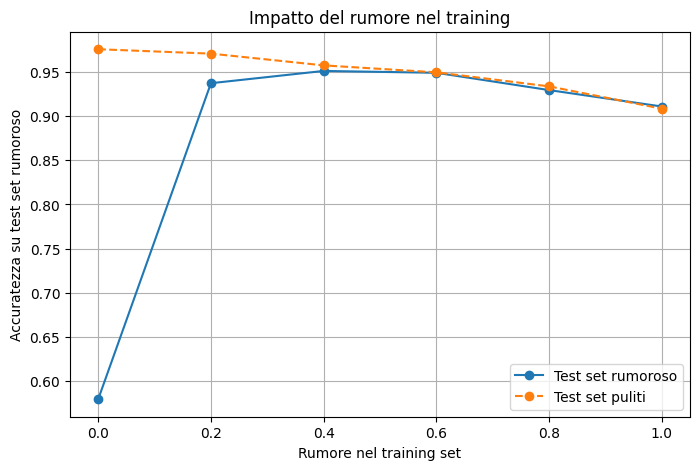

In [84]:
plt.figure(figsize=(8, 5))
plt.plot(noise_levels, accuracies_on_noisy_test, marker='o', linestyle='-')
plt.plot(noise_levels, accuracies_on_clean_test, marker='o', linestyle='--')
plt.legend(['Test set rumoroso', 'Test set puliti'])
plt.xlabel('Rumore nel training set')
plt.ylabel('Accuratezza su test set rumoroso')
plt.title('Impatto del rumore nel training')
plt.grid(True)
plt.show()

In [85]:
print("|Rumore|clean test|noisy test|")
print("|----|----|----|")
for i,j,k in zip(noise_levels,accuracies_on_clean_test, accuracies_on_noisy_test):
  print ("|", i, "|", j,"|",k,"|")

|Rumore|clean test|noisy test|
|----|----|----|
| 0.0 | 0.9759 | 0.5794 |
| 0.2 | 0.9709 | 0.9374 |
| 0.4 | 0.9576 | 0.9513 |
| 0.6 | 0.9497 | 0.9492 |
| 0.8 | 0.9338 | 0.9296 |
| 1.0 | 0.9085 | 0.911 |


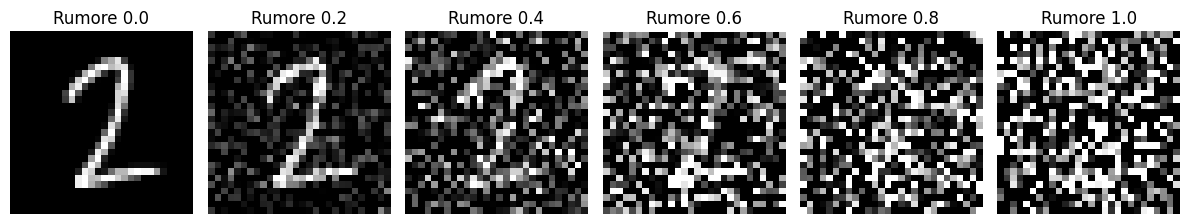

<Figure size 640x480 with 0 Axes>

In [86]:
# immagine tipo in diversi tipi di rumore
img = x_te[456].reshape(28, 28)
img_label = mnist_te_labels[456]


def add_gaussian_noise(img, std_dev):
    noise = np.random.normal(0, std_dev, img.shape)
    noisy_img = img + noise
    return np.clip(noisy_img, 0, 1)

images = []
for std in noise_levels:
    noisy_img = add_gaussian_noise(img, std)
    images.append(noisy_img)

# Mostra le immagini
fig, axs = plt.subplots(1, 6, figsize=(12, 6))
for i in range(6):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"Rumore {noise_levels[i]}")

plt.tight_layout()
plt.show()


plt.tight_layout()

## Risposta


Dal grafico si nota chiaramente quanto sia utile aggiungere rumore alle immagini durante l’addestramento.

Nel primo caso (σ = 0.0), il modello è stato addestrato solo su immagini pulite. Su test pulito ottiene un’ottima accuratezza (97.5%), ma quando viene testato su immagini rumorose, l’accuratezza scende drasticamente sotto il 60%. Questo dimostra che il modello non è in grado di gestire bene immagini degradate se non le ha mai “viste” prima.

Già con una piccola quantità di rumore (σ = 0.2), la situazione cambia molto: l’accuratezza sul test rumoroso cresce fino al 93%, mentre su test pulito rimane molto buona.

Aumentando il rumore (fino a σ = 1.0), il modello continua a comportarsi bene sui dati rumorosi, ma perde gradualmente accuratezza sui dati puliti. Questo ci dice che troppo rumore durante il training può rendere il modello meno preciso su immagini “normali”, anche se diventa più robusto su quelle disturbate.

In conclusione, un po’ di rumore nel dataset di training può migliorare la capacità del modello di generalizzare, soprattutto se ci aspettiamo che in fase di test i dati possano non essere perfetti. Bisogna però trovare un buon equilibrio per non perdere troppa precisione.

|Rumore|Acc. clean test|Acc. noisy test|
|-----|--------|--------|
| 0.0 | 0.9759 | 0.5814 |
| 0.2 | 0.9714 | 0.9367 |
| 0.4 | 0.9624 | 0.9527 |
| 0.6 | 0.952  | 0.9474 |
| 0.8 | 0.9251 | 0.9309 |
| 1.0 | 0.9062 | 0.9078 |

#BONUS

Punto bonus (o lode in caso siano raggiunti i 30/30):

* Estendere le simulazioni utilizzando il dataset Extended MNIST (EMNIST: https://github.com/aurelienduarte/emnist )
che contiene anche immagini di lettere manoscritte oltre alle cifre, oppure il dataset FashionMNIST
(https://www.kaggle.com/datasets/zalando-research/fashionmnist) che contiene immagini stilizzate di capi di
abbigliamento.

Di base, le immagini del dataset FashionMNIST sono "uguali" a quelli dei numeri. Nel senso che si tratta di immagini 28x28 a cui è associata una label (un numero). A questa label (numero) è associata una classe (vedere il codice seguente) e nel dataset sono presenti 10 classi principali.

La strategia quindi è la medesima utilizzata per i numeri:

* Importare le librerie
* Configuare i dataset di training e test
* Configurare e addestrare i/il modello MLP
* Testare il modello sui dati di test
* Stampare l'accuratezza del modello



## Librerie

In [87]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from torchvision import datasets, transforms

| Libreria                       | Descrizione breve                                                                 |
|-------------------------------|-----------------------------------------------------------------------------------|
| `torch`                       | Libreria principale per il calcolo con tensori e la gestione del device (CPU/GPU)|
| `torch.nn`                    | Moduli per definire e combinare strati di reti neurali                           |
| `torch.optim`                 | Algoritmi di ottimizzazione (es. SGD, Adam) per il training dei modelli          |
| `torch.utils.data.DataLoader`| Utilità per gestire i batch, shuffle e caricamento parallelo dei dati            |
| `torchvision.datasets`        | Dataset predefiniti (es. MNIST, CIFAR, FashionMNIST) pronti per l’uso            |
| `torchvision.transforms`      | Trasformazioni sui dati (es. ToTensor, Normalize, Resize)                        |
| `matplotlib.pyplot`           | Libreria per visualizzare immagini e grafici                                     |


## Datasets

In [88]:
fmnist_tr = datasets.FashionMNIST(root="./data", train=True, download=True)
fmnist_te = datasets.FashionMNIST(root="./data", train=False, download=True)
fmnist_tr_data, fmnist_tr_labels = fmnist_tr.data.numpy(), fmnist_tr.targets.numpy()
fmnist_te_data, fmnist_te_labels = fmnist_te.data.numpy(), fmnist_te.targets.numpy()
x_tr = fmnist_tr_data.reshape(len(fmnist_tr_data), 28*28) / 255.0
x_te = fmnist_te_data.reshape(len(fmnist_te_data), 28*28) / 255.0

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 207kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.82MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.58MB/s]


In [89]:
image = fmnist_tr_data[0]
label = fmnist_tr_labels[0]
print(f"Tipo immagine: {type(image)}")
print(f"Tipo label: {image.shape}")
print(f"Label: {label}")

Tipo immagine: <class 'numpy.ndarray'>
Tipo label: (28, 28)
Label: 9


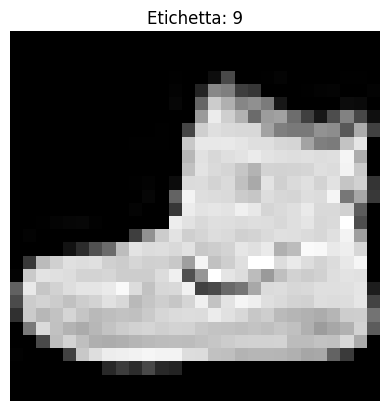

In [90]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Etichetta: {label}")
plt.axis("off")
plt.show()

Possiamo vedere che ad ogni immagine (cambiando il numero dell'elemento ottenuto) viene associato un numero "label". Con il codice seguente si ottiene le classi corrispondenti ai numeri delle immagini.

|#|class|
|------|------|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [91]:
classes = fmnist_tr.classes
class_dict = {};
i=0;
for c in classes:
  class_dict[i] = c;
  i+=1;
# genera codice per tabella md
print("|#|class|")
print("|------|------|")
for i in range(10):
  print("|",i,"|",class_dict[i], "|")


|#|class|
|------|------|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


## Configurazione e training modello MLP

In [92]:
# Inizializza il modello MLP con 1 hidden layer da 100 neuroni, massimo 20 epoche
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, random_state=42)

# Addestra il modello sui dati normalizzati
clf.fit(x_tr, fmnist_tr_labels)

# Predici le etichette sul test set
y_pred = clf.predict(x_te)

# Calcola l'accuratezza del modello
acc = accuracy_score(fmnist_te_labels, y_pred)
print(f"Accuratezza sul test set FashionMNIST: {acc:.4%}")



Accuratezza sul test set FashionMNIST: 87.9700%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [93]:
print(f"Accuratezza sul test set FashionMNIST: {acc:.4%}")

Accuratezza sul test set FashionMNIST: 87.9700%


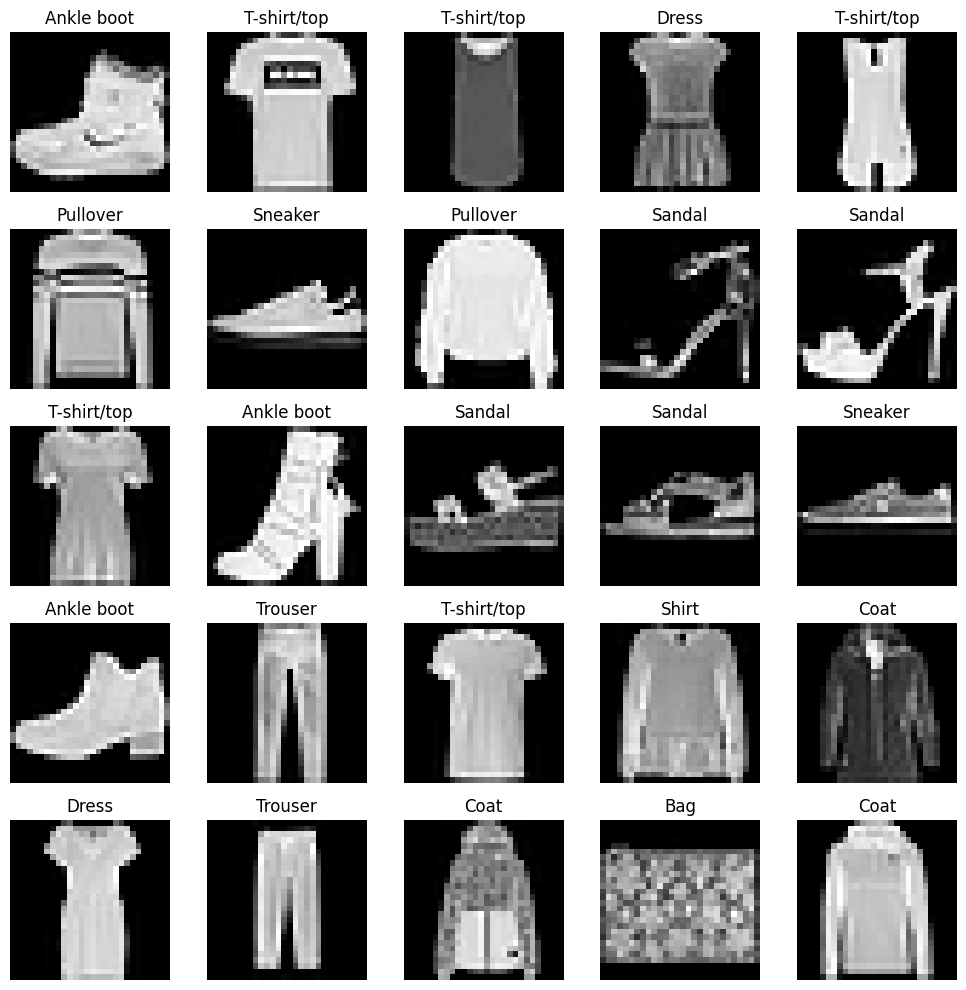

In [94]:

def print_images_grid(images, labels, class_dict, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axes = axes.flatten()  # Per iterare facilmente sugli assi

    for i, ax in enumerate(axes):
        if i < len(images):
            ax.imshow(images[i].squeeze(), cmap='gray')
            ax.set_title(class_dict[labels[i]])
            ax.axis('off')
        else:
            ax.axis('off')  # Nasconde assi extra, se ce ne sono

    plt.tight_layout()
    plt.show()

# Usa la funzione per le prime 10 immagini
print_images_grid(fmnist_tr_data[:25], fmnist_tr_labels[:25], class_dict, 5, 5)

## Confronto tra modelli con iperparametri diversi

### Diverso numero di strati e neuroni

In [95]:
# MLP_x_y dove:
# x è il numero di neuroni per strato
# y è il numero di strati nascosti

# Configurazioni dei modelli (ripresi dai modelli dei punti precedenti)
MLP_5_1 = MLPClassifier(hidden_layer_sizes=(5,), max_iter=10, random_state=42)
MLP_5_2 = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=10, random_state=42)
MLP_5_3 = MLPClassifier(hidden_layer_sizes=(5, 5, 5), max_iter=10, random_state=42)

MLP_50_1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, random_state=42)
MLP_50_2 = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=10, random_state=42)
MLP_50_3 = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=10, random_state=42)

MLP_100_1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, random_state=42)
MLP_100_2 = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10, random_state=42)
MLP_100_3 = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10, random_state=42)

In [96]:
# training
MLP_5_1.fit(x_tr, fmnist_tr_labels)
MLP_5_2.fit(x_tr, fmnist_tr_labels)
MLP_5_3.fit(x_tr, fmnist_tr_labels)

MLP_50_1.fit(x_tr, fmnist_tr_labels)
MLP_50_2.fit(x_tr, fmnist_tr_labels)
MLP_50_3.fit(x_tr, fmnist_tr_labels)

MLP_100_1.fit(x_tr, fmnist_tr_labels)
MLP_100_2.fit(x_tr, fmnist_tr_labels)
MLP_100_3.fit(x_tr, fmnist_tr_labels)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10, random_state=42)

In [97]:
# accuratezza dei vari modelli
models = [MLP_5_1, MLP_5_2, MLP_5_3,
          MLP_50_1, MLP_50_2, MLP_50_3,
          MLP_100_1, MLP_100_2, MLP_100_3]
models_names = ["MLP_5_1", "MLP_5_2", "MLP_5_3",
                "MLP_50_1", "MLP_50", "MLP_50_3",
                "MLP_100_1", "MLP_100_2", "MLP_100_3"]

accuracies = []

for model in models:
  y_pred = model.predict(x_te)
  acc = accuracy_score(fmnist_te_labels, y_pred)
  accuracies.append(acc)

print("| Model | Accuracy % |")
print("|------|------|")
for i in range(9):
  print("|",models_names[i],"|", accuracies[i], "|" )

| Model | Accuracy % |
|------|------|
| MLP_5_1 | 0.8226 |
| MLP_5_2 | 0.7804 |
| MLP_5_3 | 0.7216 |
| MLP_50_1 | 0.8684 |
| MLP_50 | 0.866 |
| MLP_50_3 | 0.8755 |
| MLP_100_1 | 0.8747 |
| MLP_100_2 | 0.8742 |
| MLP_100_3 | 0.8748 |


| Model    |Neurons|Layers|Accuracy %|
|----------|-------|------|----------|
| MLP_5_1  | 5     |   1  |  0.8226  |
| MLP_5_2  | 5     |   2  |  0.7804  |
| MLP_5_3  | 5     |   3  |  0.7216  |
| MLP_50_1 | 50    |   1  |  0.8684  |
| MLP_50_2 | 50    |   2  |  0.8660  |  
| MLP_50_3 | 50    |   3  |  0.8755  |
| MLP_100_1| 100   |   1  |  0.8747  |
| MLP_100_2| 100   |   2  |  0.8742  |
| MLP_100_3| 100   |   3  |  0.8748  |

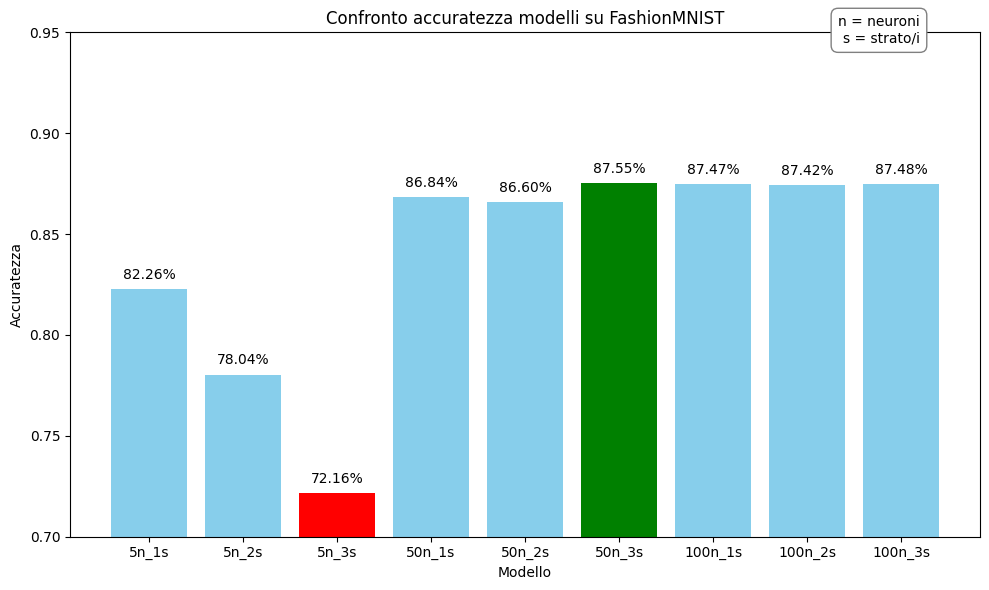

In [98]:
models_x_y = ["5n_1s", "5n_2s", "5n_3s",
              "50n_1s", "50n_2s", "50n_3s",
              "100n_1s", "100n_2s", "100n_3s"]

# Trova indice del massimo e minimo
max_idx = accuracies.index(max(accuracies))
min_idx = accuracies.index(min(accuracies))

# Lista colori
colors = ['skyblue'] * len(accuracies)
colors[max_idx] = 'green'
colors[min_idx] = 'red'

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models_x_y, accuracies, color=colors)
plt.ylim(0.7, 0.95)  # Nuovo intervallo asse Y

plt.ylabel("Accuratezza")
plt.xlabel("Modello")
plt.title("Confronto accuratezza modelli su FashionMNIST")

# Etichette sopra le barre
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.2%}", ha='center')

# Legenda testuale in alto a destra
plt.text(
    8.2, 0.945,
    "n = neuroni\ns = strato/i",
    fontsize=10,
    ha='right',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.tight_layout()
plt.show()

Con pochi neuroni (5) all'aumentare degli strati non aumenta la precisione, anzi, cala velocemente.

Con l'aumentare dei neuroni (50) migliora l'accuratezza del modello. L'aumentare degli strati in questo caso non sembra influire molto sull'accuratezza anche se è presente un lieve incremento con 3 strati.

L'aumentare dei neuroni a 100 (e il numero di strati) non sembra portare ad un sostanziale cambiamento. L'accuratezza sembra stabilizzarsi intorno all'87%


# ----------------------

In [99]:
# stampa data e ora
import datetime
fine = datetime.datetime.now()
tempo_totale = fine - inizio;
print("Inizio esecuzione codice: ", inizio)
print("Fine esecuzione codice: ", fine)
print("Tempo totale esecuzione codice: ", tempo_totale)

Inizio esecuzione codice:  2025-07-02 13:21:23.360314
Fine esecuzione codice:  2025-07-02 14:46:40.842841
Tempo totale esecuzione codice:  1:25:17.482527
